<a href="https://colab.research.google.com/github/Harsh-Singh24/ML-Model-Linear-Regression/blob/main/Updated_version_of_MLProject_LinearRregression_Bikedemandprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MODEL**    - Prediction model based on Linear Regression




**Steps Involved in Linear Regression**

1. Define the Problem.
2. Data Collection.
3. Exploratory Data Analysis (EDA) :

    1.Address multicollinearity by calculating Variance Inflation Factor (VIF).

4. Data Preprocessing.

    1.Handle Missing Values.

    2.Scaling:Normalize or Standardize.

    3.Encode Categorical Variables: One hot encoding and label encoding.

    4.Remove Outliers: Using IQR and Z-score.

6. Split Data.

7. Build the Model.

8. Model Evaluation.

9. Model Optimization:

    1.Adding interaction terms or polynomial terms (Polynomial Regression).
    2.Regularization methods like Ridge or Lasso Regression.
10. Deployment(OPTIONAL)      
   



# **Project Name**    - Bike sharing demand prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Project by  -**    Harsh Singh

# **Project Summary -**

In this project we are dealing with seoul bike sharing dataset and we will try to find a machine learning algorithm for prediction of demand of Rental bikes.

We will also try find features which affect most on the prediction.The workflow of this project is divided into following steps.

Step 1 : EDA(Exploratory data analysis)

Step 2 : Feature Engineering.

 Step 3 : Feature Selection.

  Step 4 : Model Creation and Hyperparameter Tunning.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [222]:
# Import Libraries

import numpy as np
from numpy import math
import pandas as pd

#data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [223]:
# Load Dataset


In [224]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
dataset = pd.read_csv('/content/drive/MyDrive/Data Science : Project /ML Project : Linear Regression : Bike demand prediction/SeoulBikeData.csv')

### Dataset First View

In [226]:
# Dataset First Look
pd.set_option('display.max_columns', None)
dataset

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

### Dataset Rows & Columns count

In [227]:
# Dataset Rows & Columns count
dataset.shape

(8760, 14)

Dataset have 14 features(columns) and 8760 Observations (rows)

### Dataset Information

In [228]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [229]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

0

above data set has no duplicate values

#### Missing Values/Null Values

In [230]:
# Missing Values/Null Values Count
dataset.isnull().sum().sum()

0

Simillarly above dataset have zero null values

### What did you know about your dataset?

Uptill now we found that our dataset have 8760 rows and 14 columns. Clearly above data do not have any null/missing values and also do not consist any duplicate values.

## ***2. Understanding Your Variables***

In [231]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [232]:
# Dataset Describe
dataset.describe(include = 'all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

In [233]:
dataset.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

### Variables Description

1. Dependent Variable

Rented Bike Count : Number of rented bikes per hour which is our dependent variable and we need to predict that

2. Independent Variable#

Hour: The hour of the day, starting from 0-23 it's in a digital time format

Temperature(°C): Temperature in Celsius

Humidity(%): Humidity in the air in %

Wind speed (m/s) : Speed of the wind in m/s

Visibility (10m): Visibility in m

Dew point temperature(°C): Temperature at the beggining of the day

Solar Radiation (MJ/m2): Sun contribution

Rainfall(mm): Amount of raining in mm

Snowfall (cm): Amount of snowing in cm

Seasons: Season of the year, there are only 4 season's in data .

Holiday: If the day is holiday period or not

Functioning Day: If the day is a Functioning Day or not

### Check Unique Values for each variable.

In [234]:
# Check Unique Values for each variable.
for i in dataset.columns:
  print(f'The Number of unique values in feature {i} are {dataset[i].nunique()}')

The Number of unique values in feature Date are 365
The Number of unique values in feature Rented Bike Count are 2166
The Number of unique values in feature Hour are 24
The Number of unique values in feature Temperature(°C) are 546
The Number of unique values in feature Humidity(%) are 90
The Number of unique values in feature Wind speed (m/s) are 65
The Number of unique values in feature Visibility (10m) are 1789
The Number of unique values in feature Dew point temperature(°C) are 556
The Number of unique values in feature Solar Radiation (MJ/m2) are 345
The Number of unique values in feature Rainfall(mm) are 61
The Number of unique values in feature Snowfall (cm) are 51
The Number of unique values in feature Seasons are 4
The Number of unique values in feature Holiday are 2
The Number of unique values in feature Functioning Day are 2


## 3. ***Data Wrangling***

### Functions

In [235]:
def col(dataset):
  return dataset.columns.to_list()

In [236]:
def IQR(data,col):
  I = np.percentile(data[col],75) - np.percentile(data[col],25)
  return I

def upper_limit(data,col):
  iqr = np.percentile(data[col],75) - np.percentile(data[col],25)
  ul = np.percentile(data[col],75) + (1.5 * iqr)
  return ul

def lower_limit(data,col):
  iqr = np.percentile(data[col],75) - np.percentile(data[col],25)
  ll = np.percentile(data[col],25) - (1.5 * iqr)
  return ll

In [237]:
#function for One hot encoding
def one_hot_encoding (data,column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=False)], axis=1)
    data = data.drop([column], axis=1)
    return data

In [238]:
def one_hot_encoding(data, column):
    # Create dummy variables
    dummies = pd.get_dummies(data[column], prefix=column, drop_first=False)
    # Ensure the dummy columns are numeric (0 and 1)
    dummies = dummies.astype(int)
    # Concatenate the dummy variables with the original dataset
    data = pd.concat([data, dummies], axis=1)
    # Drop the original column
    data = data.drop([column], axis=1)
    return data


### Data Wrangling Code

In [239]:
#Categorising railfall into categoties i.e 1. Light rain 2. Moderate rain 3. Heavy rain
dataset['Rainfall_cat'] = dataset['Rainfall(mm)'].apply(lambda x : 'Light' if x <= 2.5  else ('moderate' if x >2.5 and x <= 5 else 'high'))

In [240]:
#converting Date column into datetime datatype
dataset['Date'] = pd.to_datetime(dataset['Date'], format = '%d/%m/%Y')

In [241]:
#creating a new column Hour cat containing three categories of hour i.e from Peak_hour, Rest_hour and Normal_hour
dataset['Hour_cat'] = dataset['Hour'].apply(lambda x : 'Peak_hour' if x == 8 or (x >=16 and x<=22) else ('Rest_hour' if x>=1  and x <= 6 else 'Normal_hour'))

In [242]:
#creating two columns with name month and day(name of the weekdays)
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day_name()

In [243]:
dataset['Weekday/weekend'] = dataset['day'].apply(lambda x : 'Weekend' if (x=='Saturday' or x=='Sunday') else 'Weekday')

In [244]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rainfall_cat', 'Hour_cat', 'month',
       'day', 'Weekday/weekend'],
      dtype='object')

In [245]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [246]:
#assigning 0 for no holiday and 1 for holiday in Holiday feature
#dataset['Holiday'].replace({'No Holiday':0,'Holiday':1},inplace = True)
dataset['Holiday_cont'] = dataset['Holiday'].apply(lambda x : 0 if x == 'No Holiday' else 1)

In [247]:
##assigning 0 for no and 1 for yes in Functioning Day feature
#dataset['Functioning Day'].replace({'No':0,'Yes':1},inplace = True)
dataset['Functioning Day_cont'] = dataset['Functioning Day'].apply(lambda x : 0 if x == 'No' else 1)

In [248]:
#creating a new column snowfall cat containing three categories of hour i.e 1. Light snowfall 2. Moderate snowfall 3. Heavy snowfall
dataset['snowfall_cat'] = dataset['Snowfall (cm)'].apply(lambda x : 'Heavy_snowfall' if x  > 4  else ('Light_snowfal' if x>=0 and x < 2 else 'Normal_snowfall'))

### What all manipulations have you done and insights you found?

1. Created a new column Rainfall_cat for categorising the rainfall intesity and then to rainfall intensity effect on rent demand. after checking correlation we got to understant that effect of rainfall intesity on demand has very less significance.

2. Feature date is converted into date_time type.

3. Created a new column with name, hour category in this column we categorize our into three category i.e Peak_hour, Normal_hour and Rest_hour.

4. Created a new clonmn Weekday_weekend indicating day belongs to working day or weekend.

5. For column Holiday and Functioning Day assigned 0 for no and 1 for yes, so readability increases.

6. Created a new column for snowfall category to check the effect of snowfall in demand.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In this project we are trying to build a ML regression model to predict the demand of rental bikes.

#### Chart - 1 Understanding our dependent variable, Rented Bike Count

In [249]:
print(dataset['Date'].min())
print(dataset['Date'].max())

2017-12-01 00:00:00
2018-11-30 00:00:00


In [250]:
plt.rcParams['figure.figsize'] = (5,5)

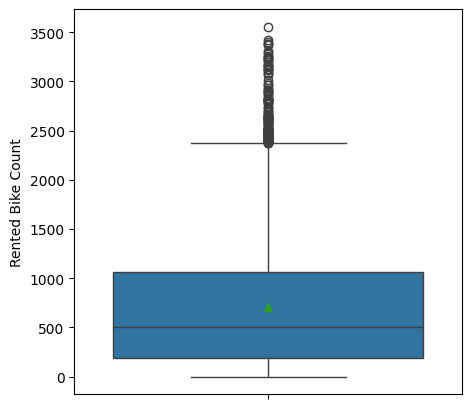

In [251]:
# Chart - 1 visualization code
sns.boxplot(y=dataset['Rented Bike Count'],showmeans = True)
plt.show()

In [252]:
#count of outliers
outlier_count = dataset[dataset['Rented Bike Count'] > upper_limit(dataset,'Rented Bike Count')]['Rented Bike Count'].count()
size = len(dataset['Rented Bike Count'])
print((outlier_count/ size) * 100 )

1.8036529680365299


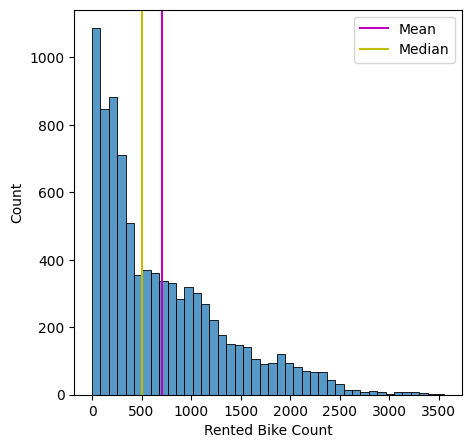

In [253]:
sns.histplot(x= dataset['Rented Bike Count'])
plt.axvline(dataset['Rented Bike Count'].mean(),color= 'm', label = 'Mean')
plt.axvline(dataset['Rented Bike Count'].median(),color= 'y', label = 'Median')
plt.legend(loc = 'upper right')
plt.show()

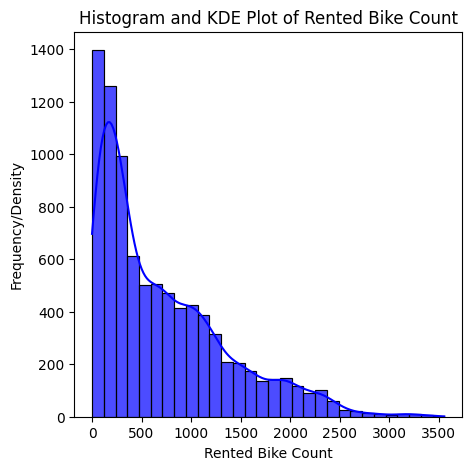

In [254]:
#KDE plot to show probability distribution
sns.histplot(dataset['Rented Bike Count'], kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Histogram and KDE Plot of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency/Density')
plt.show()


In [255]:
#skewness
from scipy.stats import skew
skew_value = skew(dataset['Rented Bike Count'])
print(skew_value)

1.1532306631480034


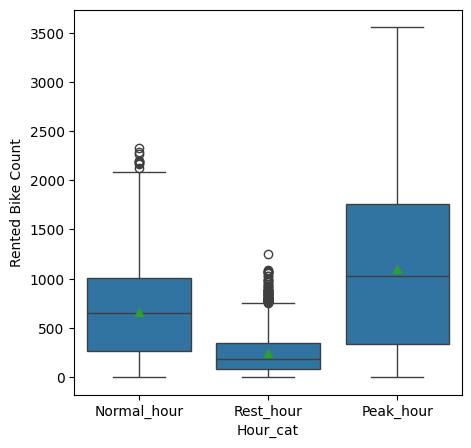

In [256]:
sns.boxplot(x=dataset['Hour_cat'], y=dataset['Rented Bike Count'],showmeans = True)
plt.show()

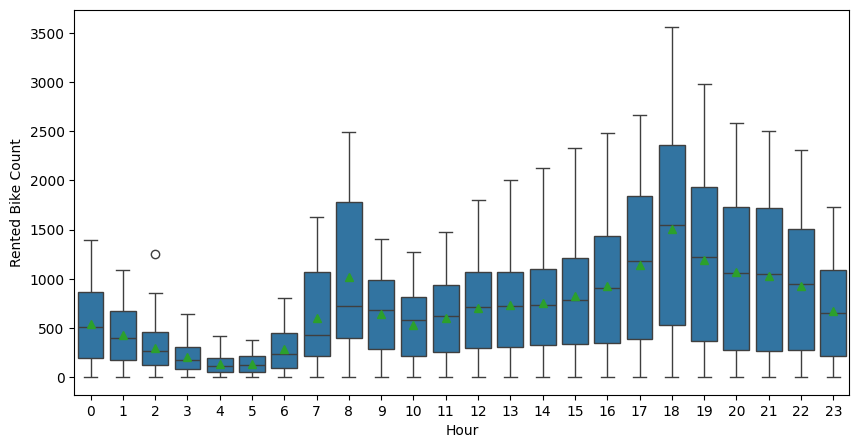

In [257]:
plt.rcParams['figure.figsize'] = (10,5)
sns.boxplot(x=dataset['Hour'], y=dataset['Rented Bike Count'],showmeans = True)
plt.show()

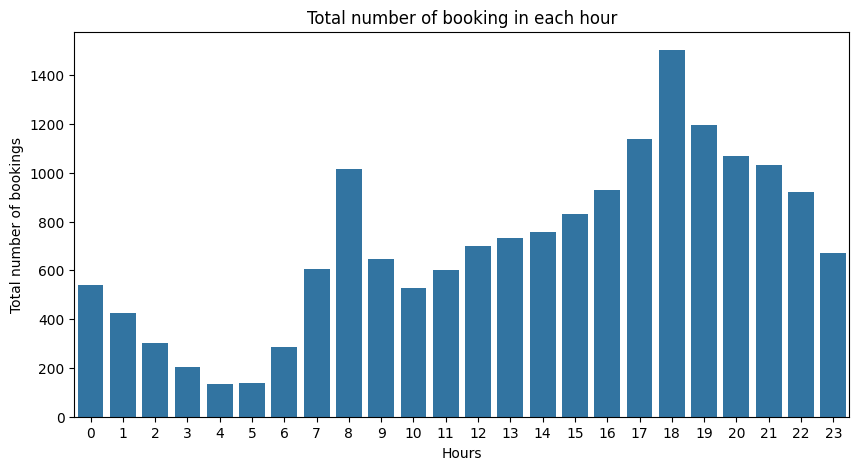

In [258]:
#np.array(dataset.groupby(['Hour'])['Rented Bike Count'].sum())
sns.barplot(x= dataset.Hour.unique(), y = np.array(dataset.groupby(['Hour'])['Rented Bike Count'].mean()))
plt.title('Total number of booking in each hour')
plt.xlabel('Hours')
plt.ylabel('Total number of bookings')
plt.show()

##### 1. Why did you pick the specific chart?

When data is numerical, Histogram is used to check the distrubtion of the data. Similarly bar plot is also used to check the distribution of our numerical data. It also represnt the IQR( 75th percentile, 25th percentile with median and mean), Min value(Q1-1.5*IQR,non-outlier) and Max value(Q3+1.5*IQR,non-outlier).

##### 2. What is/are the insight(s) found from the chart?

skewness is 1.15.  

From above histogram we can see the mean and median are around 750 and 500. We also see from box plot that max demand is around 2500 and above that are outliers. But we can not remove them blindly.

As we describe the data using hours of booking our result changes dramatically.
now we can only see one outlier in our data. This shows demands is highly depending upon hour.

#### Chart - 2 Temprature with Rented Bike Count

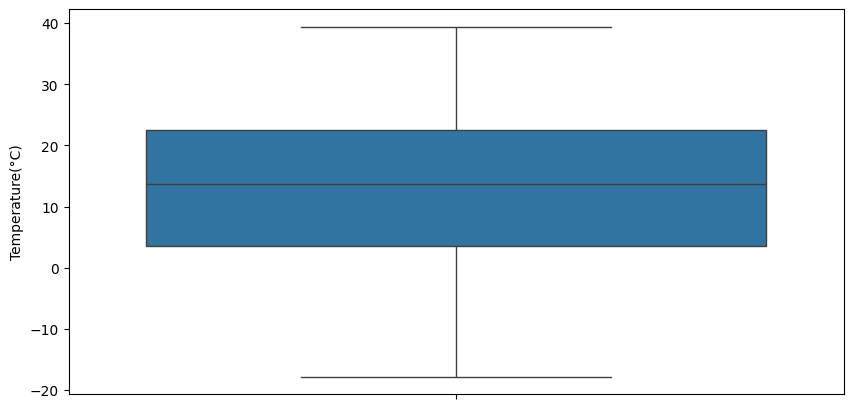

In [259]:
sns.boxplot(dataset['Temperature(°C)'])
plt.show()

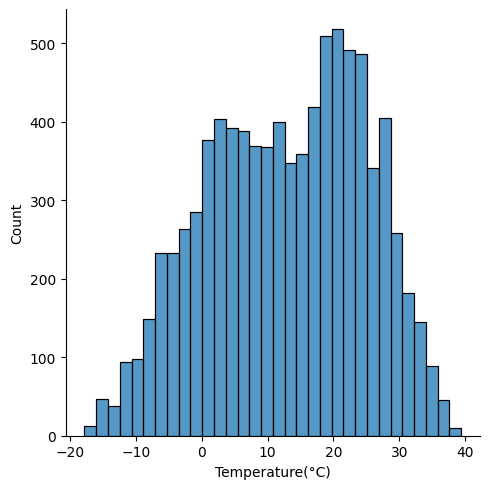

In [260]:
sns.displot(dataset['Temperature(°C)'])
plt.show()

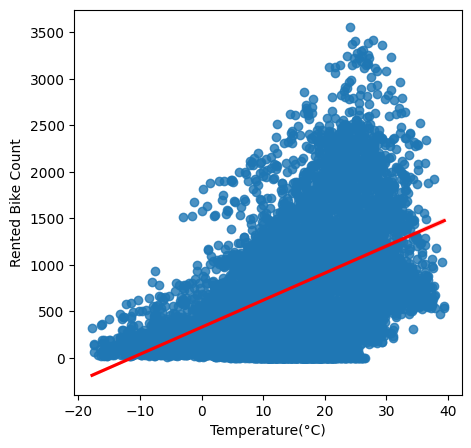

In [261]:
# Chart - 2 visualization code
plt.rcParams['figure.figsize'] = (5,5)
sns.regplot(x = dataset['Temperature(°C)'],y = dataset['Rented Bike Count'],line_kws={"color": "red"})
plt.show()

In [262]:
corr_chart2 = dataset['Temperature(°C)'].corr(dataset['Rented Bike Count'])
print(corr_chart2)

0.5385581530139789


##### 1. Why did you pick the specific chart?

The regression plots in seaborn is used to create a scatter plot with a linear regression line fitted to the data. It’s particularly useful for visualizing the relationship between two continuous variables and helps you see if the relationship is linear and how well the data fits the linear regression model.

##### 2. What is/are the insight(s) found from the chart?

We can see from the above chart as the temprature increase the booking count is also increasing. Both the features are moderatley correlated with each other with pearson correlation coefficient of 0.53

##### 3. Will the gained insights help creating a positive business impact?

At high temprature demand will be more so business can increase the availability of bikes as well as can increase the rental price to increase profit. But at very high temprature demand is again decreasing.

We can observe from reg plot that. for regresssion, Heteroscedasticity is there.

#### Chart - 3 Dew Point templrature with Rented Bike count.

Dew Point temprature increases moisture(Humidity) increases which leads to less comfort

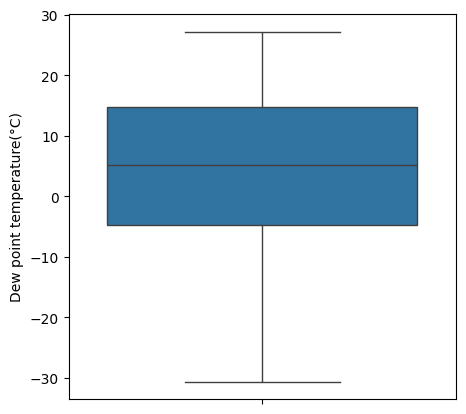

In [263]:
sns.boxplot(dataset['Dew point temperature(°C)'])
plt.show()

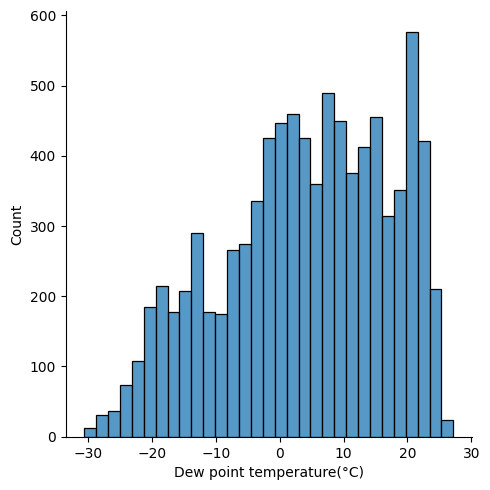

In [264]:
# Chart - 3 visualization code

sns.displot(dataset['Dew point temperature(°C)'])
plt.show()

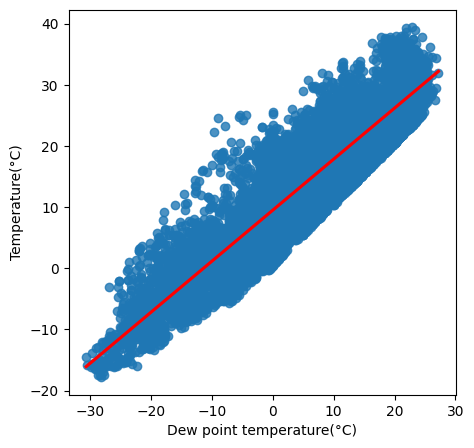

In [265]:
sns.regplot(x = dataset['Dew point temperature(°C)'],y = dataset['Temperature(°C)'],line_kws={"color": "red"})
plt.show()

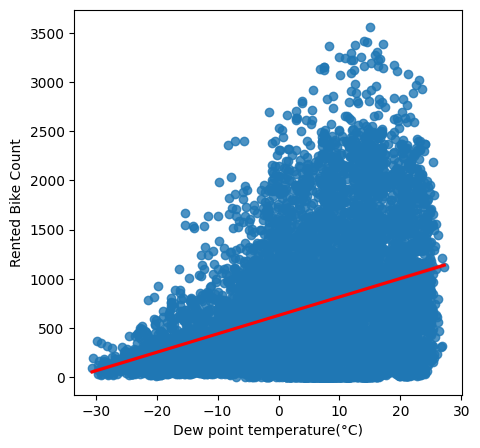

In [266]:
sns.regplot(x = dataset['Dew point temperature(°C)'],y = dataset['Rented Bike Count'],line_kws={"color": "red"})
plt.show()

In [267]:
corr_chart3 = dataset['Dew point temperature(°C)'].corr(dataset['Rented Bike Count'])
print(corr_chart3)

0.37978812124497235


In [268]:
corr_chart3A = dataset['Temperature(°C)'].corr(dataset['Dew point temperature(°C)'])
print(corr_chart3A)

0.9127982187579919


##### 1. Why did you pick the specific chart?

The regression plots in seaborn is used to create a scatter plot with a linear regression line fitted to the data. It’s particularly useful for visualizing the relationship between two continuous variables and helps you see if the relationship is linear and how well the data fits the linear regression model.

##### 2. What is/are the insight(s) found from the chart?

We can see from the above chart as the Dew point temperature increase the booking count is also increasing. Both the features are moderatley correlated with each other with pearson correlation coefficient of 0.379. The correlation exists but it is irrelatively small.

Also, We checked the correlation between temperature and Dew point temperature.
and these variables are highly correlated so we can use one them in our ML algo but temprature shows relatively high correlation with bookings so it is advisable to use temprature.

##### 3. Will the gained insights help creating a positive business impact?

At high Dew point temperature demand will be more so business can increase the availability of bikes as well as can increase the rental price to increase profit.

At very high temprature Dew point temperature demand decreases.

In reg plot, we can see high heteroscedasticity.

#### Chart - 4 Rainfall with Rented Bike Count

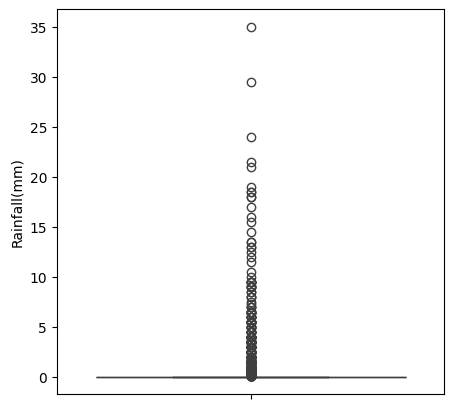

In [269]:
sns.boxplot(dataset['Rainfall(mm)'])
plt.show()

In [270]:
dataset['Rainfall(mm)'].describe(include = 'all')

count    8760.000000
mean        0.148687
std         1.128193
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rainfall(mm), dtype: float64

In [271]:
print('90th perncetile of Rainfall is : ', np.percentile(dataset['Rainfall(mm)'],90))
print('92.5th perncetile of Rainfall is : ', np.percentile(dataset['Rainfall(mm)'],92.5))
print('95th perncetile of Rainfall is : ', np.percentile(dataset['Rainfall(mm)'],95))
print('97.5th perncetile of Rainfall is : ', np.percentile(dataset['Rainfall(mm)'],97.5))
print('99th perncetile of Rainfall is : ', np.percentile(dataset['Rainfall(mm)'],99))

90th perncetile of Rainfall is :  0.0
92.5th perncetile of Rainfall is :  0.0
95th perncetile of Rainfall is :  0.4
97.5th perncetile of Rainfall is :  1.5
99th perncetile of Rainfall is :  4.0


In [272]:
dataset[dataset['Rainfall(mm)'] > 4.0].shape

(79, 22)

Only 79 observation where rainfall is more than 4mm/Hr

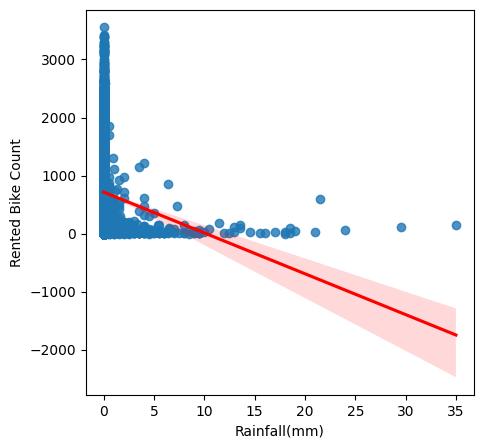

In [273]:
# Chart - 4 visualization code
sns.regplot(x = dataset['Rainfall(mm)'],y = dataset['Rented Bike Count'],line_kws={"color": "red"})
plt.show()

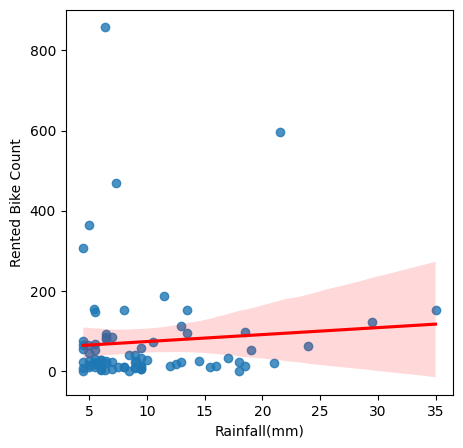

In [274]:
# Chart - 4 visualization code
sns.regplot(x = dataset[dataset['Rainfall(mm)'] > 4]['Rainfall(mm)'],y = dataset[dataset['Rainfall(mm)'] > 4]['Rented Bike Count'],line_kws={"color": "red"})
plt.show()

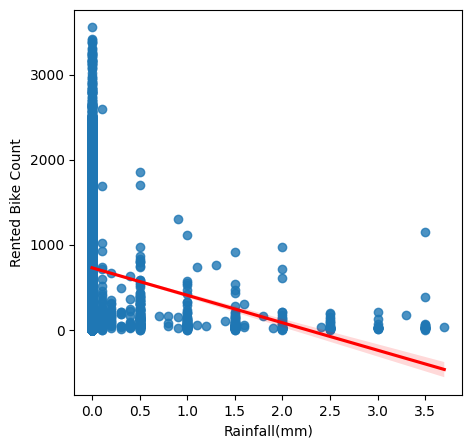

In [275]:
# Chart - 4 visualization code
sns.regplot(x = dataset[dataset['Rainfall(mm)'] < 4]['Rainfall(mm)'],y = dataset[dataset['Rainfall(mm)'] < 4]['Rented Bike Count'],line_kws={"color": "red"})
plt.show()

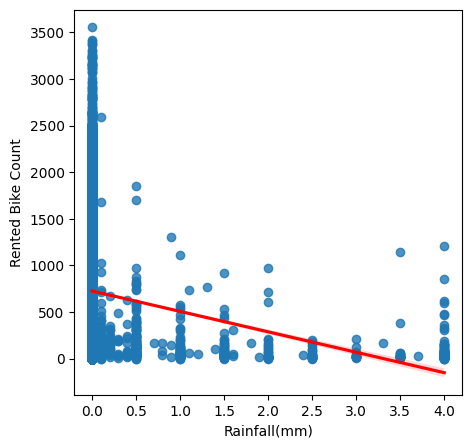

In [276]:
dataset_copy = dataset.copy()
dataset_copy['Rainfall(mm)'] = dataset_copy['Rainfall(mm)'].apply(lambda x : x if x < 4  else 4)
sns.regplot(x = dataset_copy['Rainfall(mm)'],y = dataset_copy['Rented Bike Count'],line_kws={"color": "red"})
plt.show()

In [277]:
corr_chart4 = dataset['Rainfall(mm)'].corr(dataset['Rented Bike Count'])
corr_chart4A = dataset_copy['Rainfall(mm)'].corr(dataset_copy['Rented Bike Count'])
print(corr_chart4)
print('for outlier handled', corr_chart4A)

-0.12307395980285019
for outlier handled -0.1742242510183176


In [278]:
dataset['Rainfall_cat'].value_counts()

Rainfall_cat
Light       8633
high          66
moderate      61
Name: count, dtype: int64

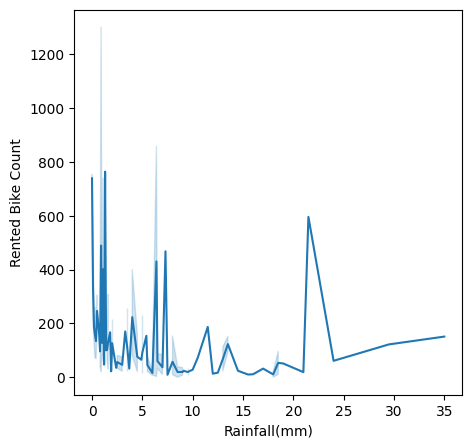

In [279]:
sns.lineplot(x = dataset['Rainfall(mm)'], y = dataset['Rented Bike Count'])
plt.show()

In [280]:
corr_chart4a = dataset[dataset['Rainfall_cat']=='high']['Rainfall(mm)'].corr(dataset['Rented Bike Count'])
corr_chart4a

0.10047789060798162

In [281]:
corr_chart4b = dataset[dataset['Rainfall_cat']=='moderate']['Rainfall(mm)'].corr(dataset['Rented Bike Count'])
corr_chart4b

0.08027795963361832

In [282]:
corr_chart4c = dataset[dataset['Rainfall_cat']=='Light']['Rainfall(mm)'].corr(dataset['Rented Bike Count'])
corr_chart4c

-0.15657724641518353

##### 1. Why did you pick the specific chart?

The regression plots in seaborn is used to create a scatter plot with a linear regression line fitted to the data. It’s particularly useful for visualizing the relationship between two continuous variables and helps you see if the relationship is linear and how well the data fits the linear regression model.

A line plot is a basic chart type used to visualize data points connected by straight lines. It is particularly useful for showing trends over time or relationships between continuous variables.

##### 2. What is/are the insight(s) found from the chart?

We can see from the above chart as the Rainfall increases the booking count  decreases. Both the features are have low correlation with each other with pearson correlation coefficient of -0.123. we can ignore this feature from our machine learning model.

We can see there is no linear relation.From scatter plot we can see there is niether a quadratic nor exponential relation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Rainfall has no significant effect on demand

#### Chart - 5 Hours With Rented Bike Count

Hours are appearing numerical but they are categorical in nature: need one hot encoding.

In [283]:
y_chart5 = list(dataset.groupby(dataset['Hour'])['Rented Bike Count'].sum())
x_chart5 = list(dataset.groupby(dataset['Hour'])['Rented Bike Count'].sum().index)

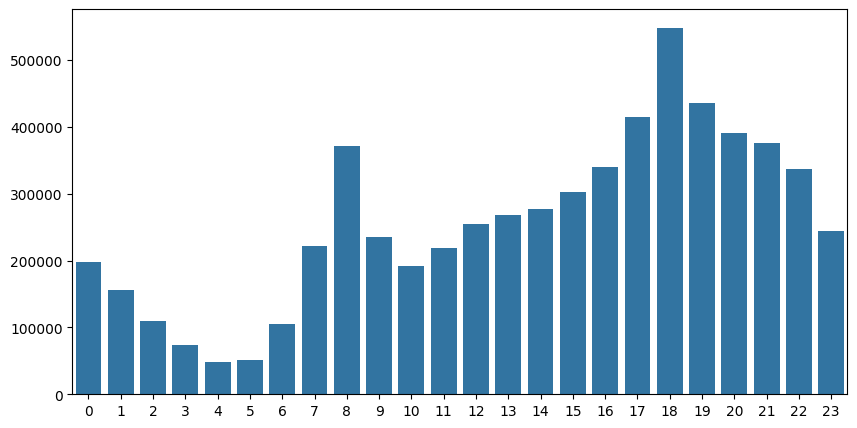

In [284]:
# Chart - 5 visualization code
plt.rcParams['figure.figsize'] = (10,5)
sns.barplot(x= x_chart5,y = y_chart5)
plt.show()

In [285]:
dataset.groupby(dataset['Hour_cat'])['Rented Bike Count'].mean()

Hour_cat
Normal_hour     661.394795
Peak_hour      1100.764726
Rest_hour       248.397260
Name: Rented Bike Count, dtype: float64

In [286]:
y_chart5a = list(dataset.groupby(dataset['Hour_cat'])['Rented Bike Count'].mean())
x_chart5a = list(dataset.groupby(dataset['Hour_cat'])['Rented Bike Count'].mean().index)

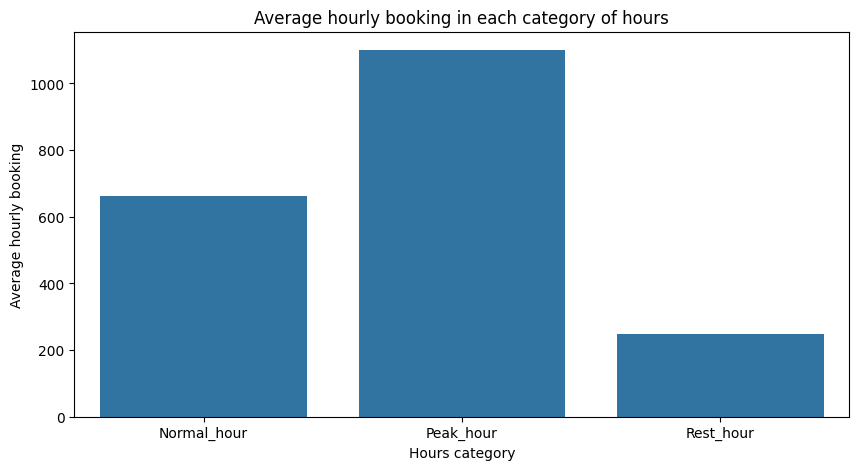

In [287]:
sns.barplot(x = x_chart5a,y = y_chart5a)
plt.title('Average hourly booking in each category of hours')
plt.xlabel('Hours category')
plt.ylabel('Average hourly booking')
plt.show()

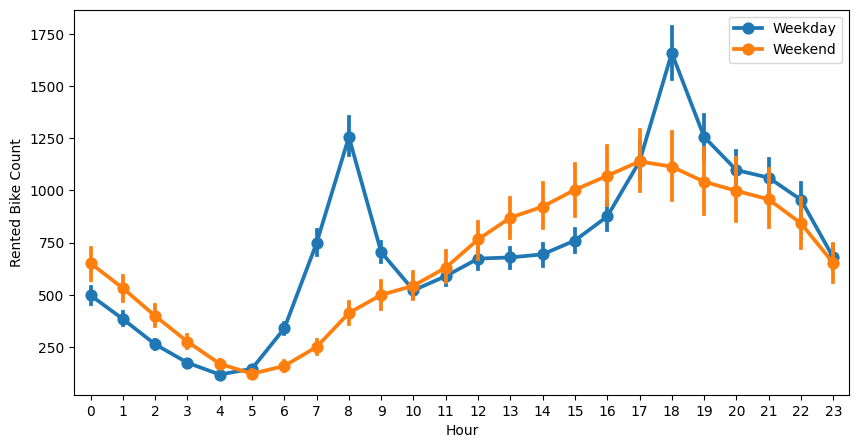

In [288]:
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='Weekday/weekend')
plt.legend(loc = 'upper right')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts should be used when you are showing segments of information. Vertical bar charts are useful to compare different categorical or discrete variables, such as age groups, classes, schools, etc., as long as there are not too many categories to compare

##### 2. What is/are the insight(s) found from the chart?

from our chart we can see that during specific hours of the demand is very high.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 During peak hours, Business can increase the rent price to generate more revanue And also can increase the availibilty of rented bikes.

#### Chart - 6 Rented Bike Count with Holidays

In [289]:
series = dataset['Holiday'].value_counts().index
values = dataset['Holiday'].value_counts().to_list()

dataset_holiday = pd.DataFrame({'Holiday':series,'Count':values})
dataset_holiday['count'] = dataset_holiday['Count']/24
dataset_holiday

Holiday  Count  count
0  No Holiday   8328  347.0
1     Holiday    432   18.0

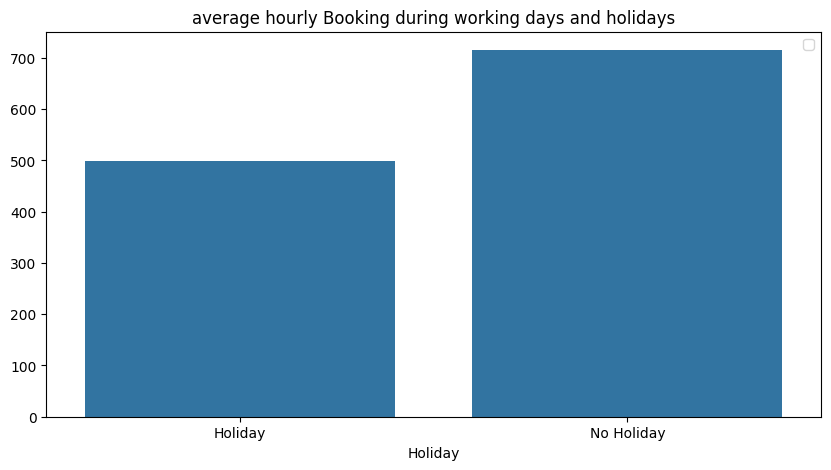

In [290]:
# Chart - 6 visualization code
sns.barplot(x = dataset.groupby('Holiday')['Rented Bike Count'].mean().index, y = sorted(dataset.groupby('Holiday')['Rented Bike Count'].mean()))
plt.legend(loc = 'upper right')
plt.title('average hourly Booking during working days and holidays')
plt.show()

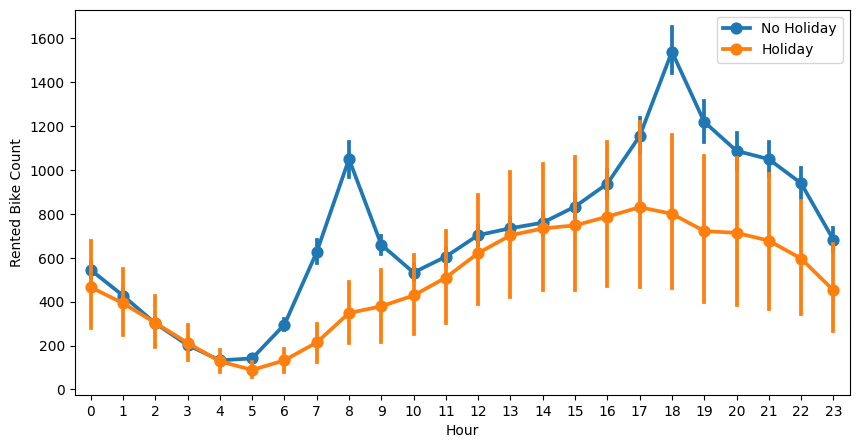

In [291]:
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='Holiday',)
plt.legend(loc = 'upper right')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot is also used to check the distribution of our numerical data.

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

##### 2. What is/are the insight(s) found from the chart?

From above chart we can conclude on Holidays demand is more smooth. We can also conclude we can see a sudden surge in demand during No Holidays at specefic hours. which signfies at opening and closing time of most of the offices demand increases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Demands during peak hours reduced significantly on holidays.

#### Chart - 7 Rented Bike Count with Functional days

In [292]:
dataset[dataset['Functioning Day'] == 'No'].groupby('Date')['Hour'].count()

Date
2018-04-11    24
2018-05-10    24
2018-09-18    24
2018-09-19    24
2018-09-28    24
2018-09-30    24
2018-10-02    24
2018-10-04    24
2018-10-06     7
2018-10-09    24
2018-11-03    24
2018-11-06    24
2018-11-09    24
Name: Hour, dtype: int64

In [293]:
series = dataset['Functioning Day'].value_counts().index
values = dataset['Functioning Day'].value_counts().to_list()

dataset_func = pd.DataFrame({'Functioning Day':series,'Count':values})
dataset_func['count'] = dataset_func['Count']/24
dataset_func

Functioning Day  Count       count
0             Yes   8465  352.708333
1              No    295   12.291667

In [294]:
dataset[(dataset['Functioning Day'] == 0) & (dataset['Rented Bike Count'] > 0)]['Functioning Day'].count()

0

In [295]:
y7 = dataset.groupby('Functioning Day')['Rented Bike Count'].mean( ).to_list()
y7

[0.0, 729.1569994093326]

In [296]:
x7 = ['Yes','No']
x7

['Yes', 'No']

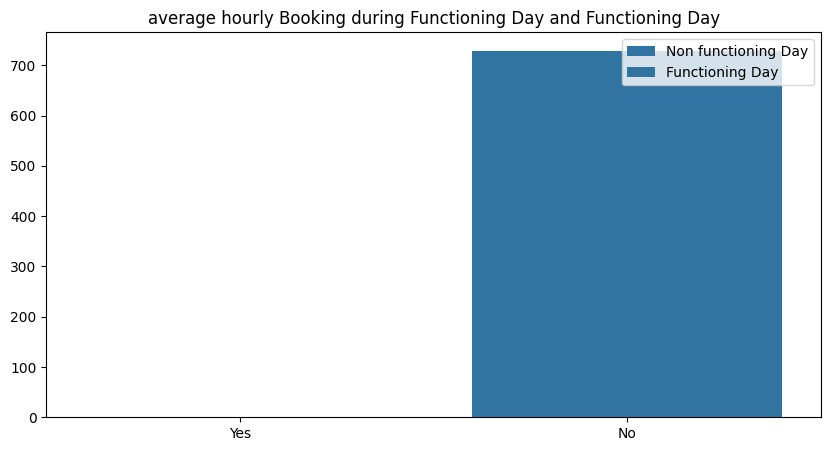

In [297]:
# Chart - 7 visualization code
sns.barplot(x = x7, y = y7, label = ['Non functioning Day','Functioning Day'])
plt.legend(loc = 'upper right')
plt.title('average hourly Booking during Functioning Day and Functioning Day')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot is also used to check the distribution of our numerical data.

##### 2. What is/are the insight(s) found from the chart?

On Non functional day, No bookings were made which is obvious. It will create my model Bias. we will remove it in our model 2.

#### Chart - 8 Rented Bike Count with Seasons and Months

In [298]:
col(dataset)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Rainfall_cat',
 'Hour_cat',
 'month',
 'day',
 'Weekday/weekend',
 'Holiday_cont',
 'Functioning Day_cont',
 'snowfall_cat']

In [299]:
x8 = dataset.groupby(['Seasons'])['Rented Bike Count'].mean().index
x8

Index(['Autumn', 'Spring', 'Summer', 'Winter'], dtype='object', name='Seasons')

In [300]:
y8 = dataset.groupby(['Seasons'])['Rented Bike Count'].mean().to_list()
y8

[819.5979853479854, 730.03125, 1034.0733695652175, 225.5412037037037]

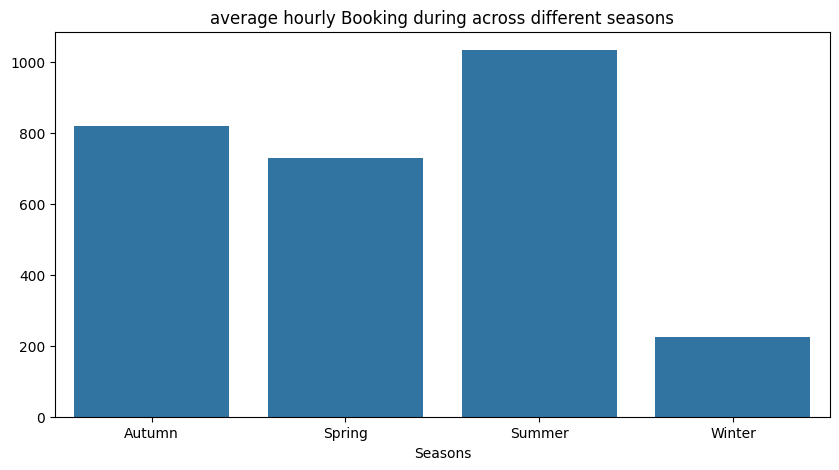

In [301]:
# Chart - 8 visualization code
sns.barplot(x = x8, y = y8)
plt.title('average hourly Booking during across different seasons')
plt.show()

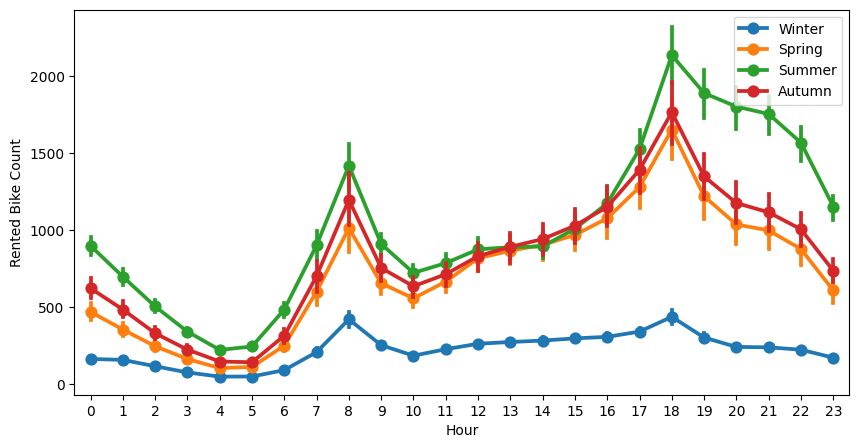

In [302]:
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='Seasons')
plt.legend(loc = 'upper right')
plt.show()

In [303]:
dataset.groupby(['month'])['Rented Bike Count'].mean()

month
1      201.620968
2      225.941964
3      511.551075
4      728.093056
5      950.387097
6     1245.676389
7      987.177419
8      876.192204
9      935.572222
10     874.563172
11     646.826389
12     249.099462
Name: Rented Bike Count, dtype: float64

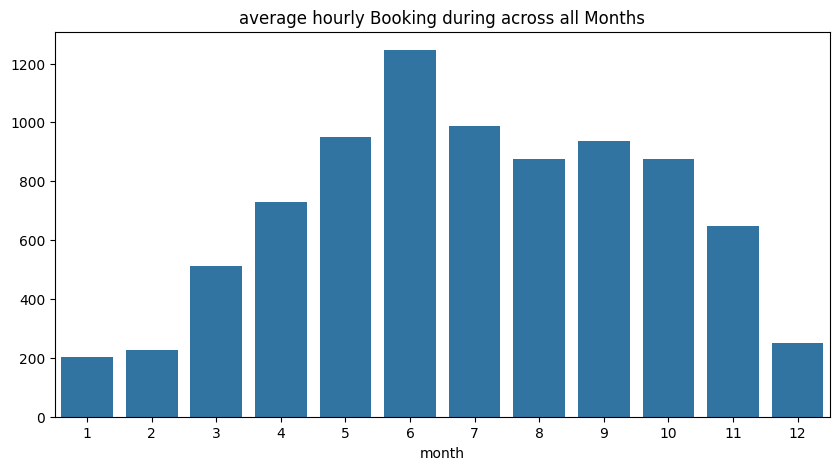

In [304]:
sns.barplot(x = dataset.groupby(['month'])['Rented Bike Count'].mean().index, y = dataset.groupby(['month'])['Rented Bike Count'].mean().to_list())
plt.title('average hourly Booking during across all Months')
plt.show()

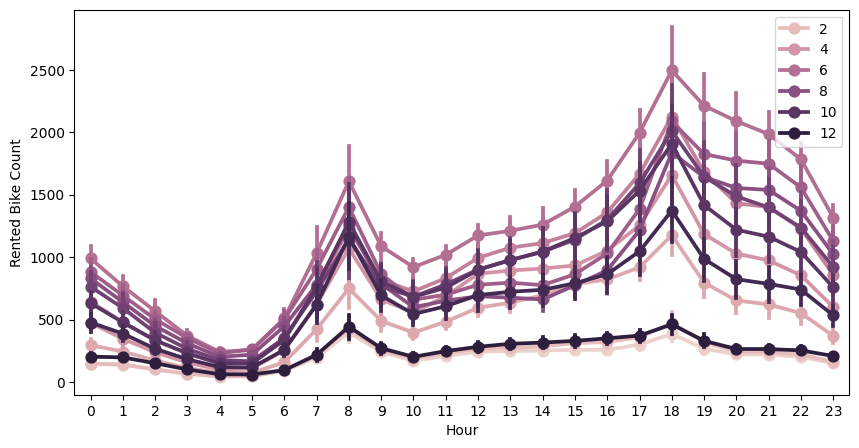

In [305]:
sns.pointplot(data=dataset,x='Hour',y='Rented Bike Count',hue='month')
plt.legend(loc = 'upper right')
plt.show()

##### 1. Why did you pick the specific chart?

Bar plot is also used to check the distribution of our numerical data.

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

Point plots can be more useful than bar plots for focusing comparisons between different levels of one or more categorical variables. They are particularly adept at showing interactions: how the relationship between levels of one categorical variable changes across levels of a second categorical variable. The lines that join each point from the same hue level allow interactions to be judged by differences in slope, which is easier for the eyes than comparing the heights of several groups of points or bars.

##### 2. What is/are the insight(s) found from the chart?

least booking are observed in winter season where as most bookings are occurend in summers. Distribution of bookings with respect to Hours are same for 'Autumn', 'Spring', 'Summer' and slightly different for 'Winters'.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Availability should be more in summer season and during winters few bikes can be used for different purpose to optimize the profit.

#### Chart - 9 Rented Bike Count with Snowfall

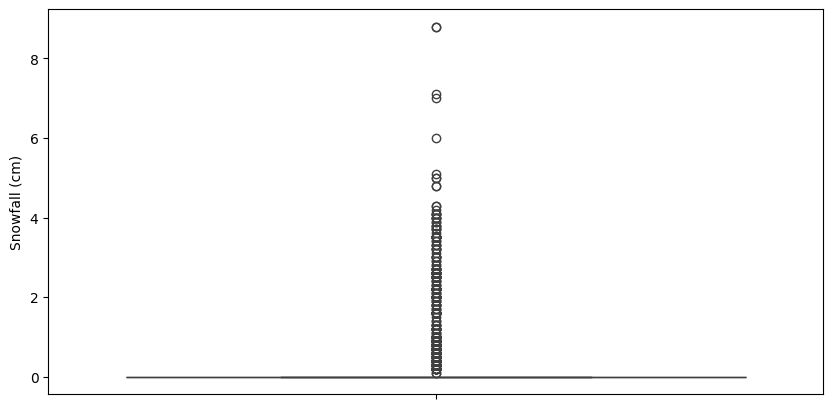

In [306]:
sns.boxplot(dataset['Snowfall (cm)'])
plt.show()

In [307]:
print('90th perncetile of Snowfall is : ', np.percentile(dataset['Snowfall (cm)'],90))
print('92.5th perncetile of Snowfall is : ', np.percentile(dataset['Snowfall (cm)'],92.5))
print('95th perncetile of Snowfall is : ', np.percentile(dataset['Snowfall (cm)'],95))
print('97.5th perncetile of Snowfall is : ', np.percentile(dataset['Snowfall (cm)'],97.5))
print('99th perncetile of Snowfall is : ', np.percentile(dataset['Snowfall (cm)'],99))

90th perncetile of Snowfall is :  0.0
92.5th perncetile of Snowfall is :  0.0
95th perncetile of Snowfall is :  0.2
97.5th perncetile of Snowfall is :  1.0
99th perncetile of Snowfall is :  2.5


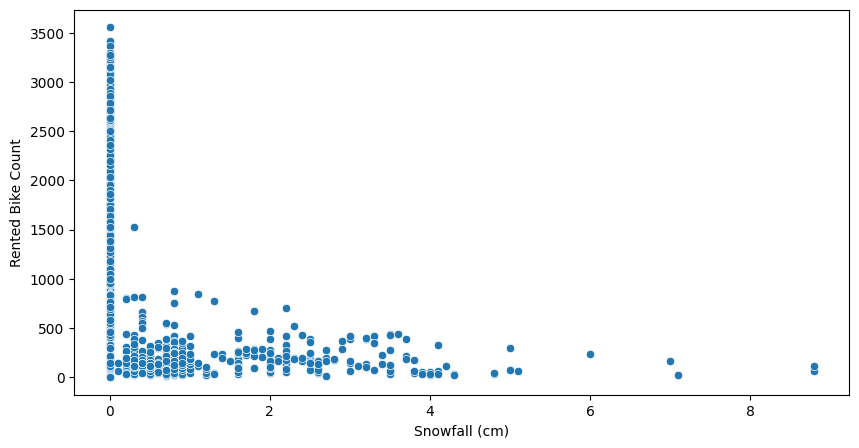

In [308]:
# Chart - 9 visualization code
sns.scatterplot(data = dataset, x = 'Snowfall (cm)', y = 'Rented Bike Count')
plt.show()

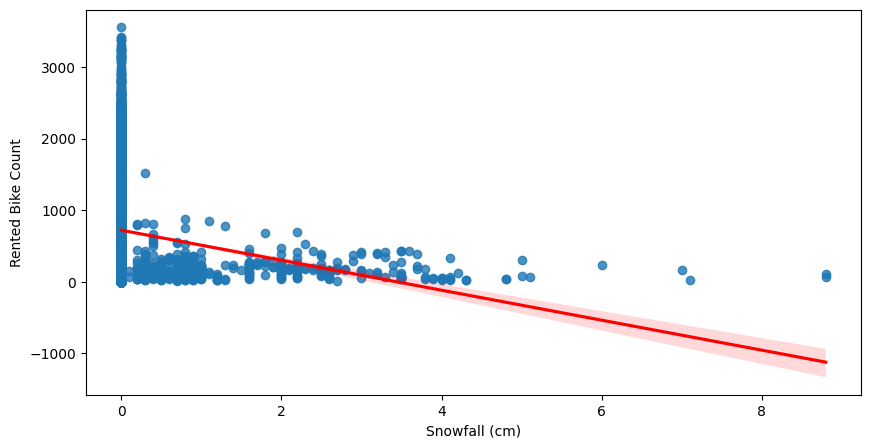

In [309]:
sns.regplot(data = dataset, x = 'Snowfall (cm)', y = 'Rented Bike Count',line_kws={"color": "red"})
plt.show()

In [310]:
corr_snowfall_demand = dataset['Snowfall (cm)'].corr(dataset['Rented Bike Count'])
print(corr_snowfall_demand)

-0.1418036499974599


In [311]:
dataset.groupby('snowfall_cat')['Rented Bike Count'].mean()

snowfall_cat
Heavy_snowfall     102.882353
Light_snowfal      713.212297
Normal_snowfall    184.349593
Name: Rented Bike Count, dtype: float64

In [312]:
x9 = x = dataset.groupby('snowfall_cat')['Rented Bike Count'].mean().index.to_list()
x9

['Heavy_snowfall', 'Light_snowfal', 'Normal_snowfall']

In [313]:
y9 = dataset.groupby('snowfall_cat')['Rented Bike Count'].mean().to_list()
y9

[102.88235294117646, 713.2122969837587, 184.34959349593495]

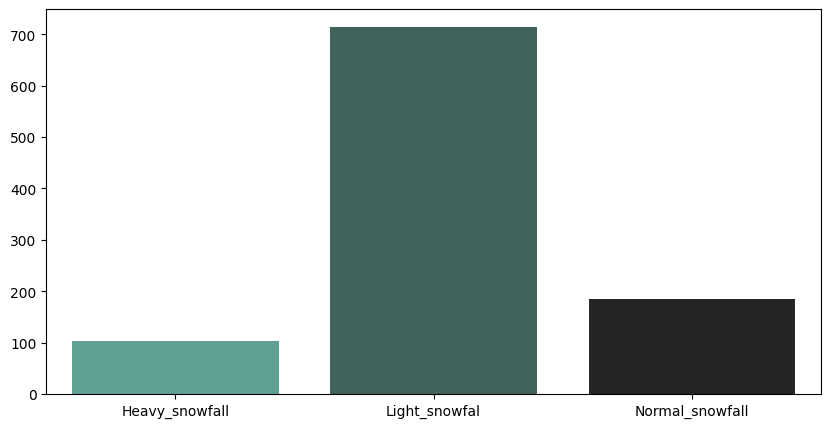

In [314]:
sns.barplot(x = x9, y = y9, palette = 'dark:#5A9_r')
plt.show()

In [315]:
dataset[dataset['Seasons'] == 'Winter'].groupby('snowfall_cat')['snowfall_cat'].value_counts()

snowfall_cat
Heavy_snowfall       10
Light_snowfal      2049
Normal_snowfall     101
Name: count, dtype: int64

In [316]:
dataset[dataset['Seasons'] == 'Summer'].groupby('snowfall_cat')['snowfall_cat'].value_counts()

snowfall_cat
Light_snowfal    2208
Name: count, dtype: int64

In [317]:
dataset.groupby('snowfall_cat')['snowfall_cat'].value_counts()

snowfall_cat
Heavy_snowfall       17
Light_snowfal      8620
Normal_snowfall     123
Name: count, dtype: int64

For Heavy Rainfall samplesize in not sufficient

##### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

Bar plot is also used to check the distribution of our numerical data.



##### 2. What is/are the insight(s) found from the chart?

From regression plot we can analyse that with increase of snowfall , demand decreases but it also shows that when snowfall is more than 4cm the demand becomes negative which is not the possible.

to counter this created a new column with snowfall category and bar chart is ploted over it. this column with one-hot encoding can be used  in our ML model.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

With increase of snowfall, Demand decreases so business can use bikes for different purpose.

#### Chart - 10 Rented Bike Count with Humidity

In [318]:
col(dataset)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Rainfall_cat',
 'Hour_cat',
 'month',
 'day',
 'Weekday/weekend',
 'Holiday_cont',
 'Functioning Day_cont',
 'snowfall_cat']

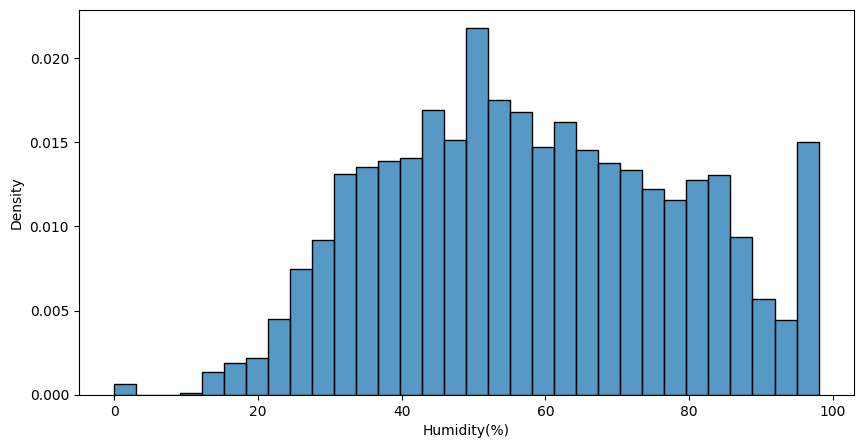

In [319]:
sns.histplot(x= dataset['Humidity(%)'],stat='density')
plt.show()

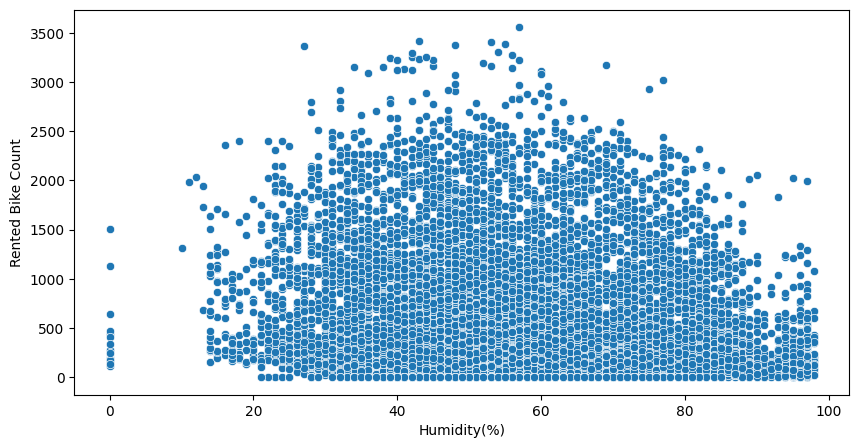

In [320]:
# Chart - 10 visualization code
sns.scatterplot(data = dataset, x = 'Humidity(%)', y = 'Rented Bike Count')
plt.show()

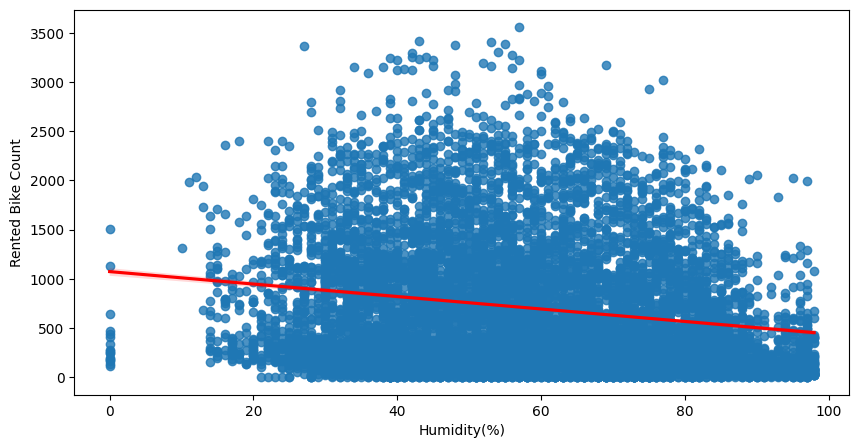

In [321]:
sns.regplot(data = dataset, x = 'Humidity(%)', y = 'Rented Bike Count',line_kws={"color": "red"})
plt.show()

In [322]:
corr_Humidity_demand = dataset['Humidity(%)'].corr(dataset['Rented Bike Count'])
print(corr_Humidity_demand)

-0.19978016700089823


##### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see that Humidity is negatively correlated with Demand with the correlation coeficeint of -0.2 indicating no significant linear relationship between demand and Humidiity

#### Chart - 11 Rented Bike Count with Windspeed.

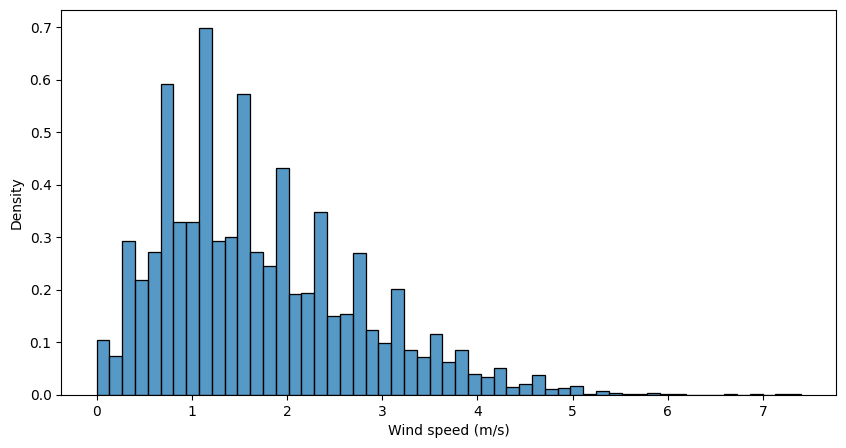

In [323]:
# Chart - 11 visualization code
sns.histplot(x= dataset['Wind speed (m/s)'],stat='density')
plt.show()

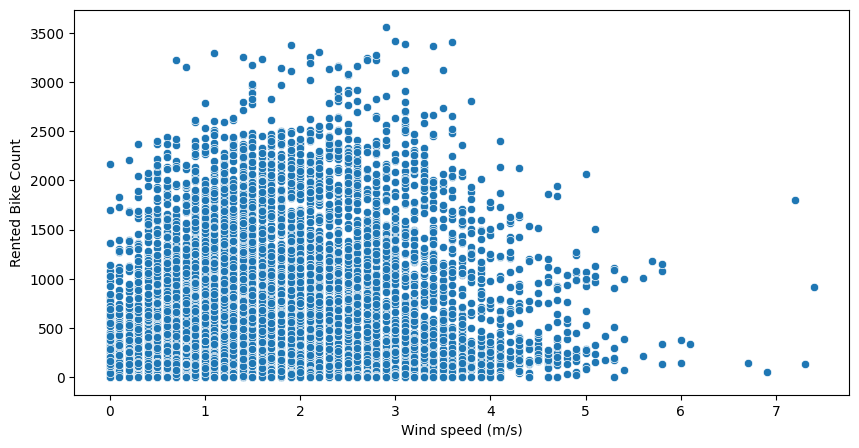

In [324]:
sns.scatterplot(data = dataset, x = 'Wind speed (m/s)', y = 'Rented Bike Count')
plt.show()

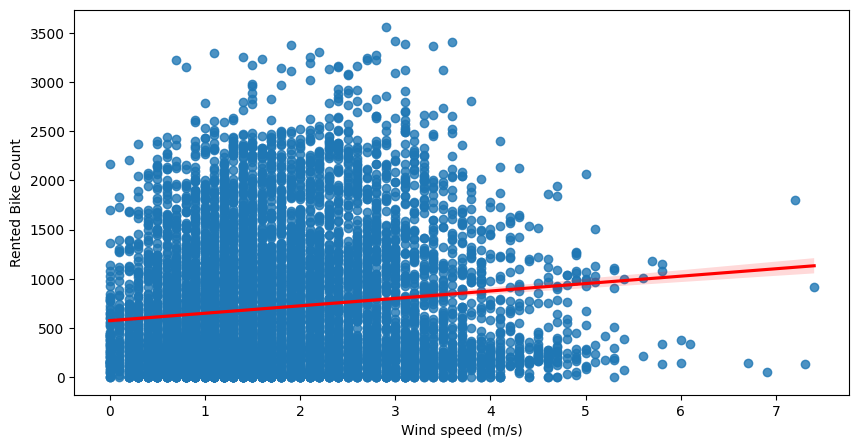

In [325]:
sns.regplot(data = dataset, x = 'Wind speed (m/s)', y = 'Rented Bike Count',line_kws={"color": "red"})
plt.show()

In [326]:
corr_wind_demand = dataset['Wind speed (m/s)'].corr(dataset['Rented Bike Count'])
print(corr_wind_demand)

0.12110844818838669


In [327]:
dataset['Wind speed (m/s)'].mean()

1.7249086757990868

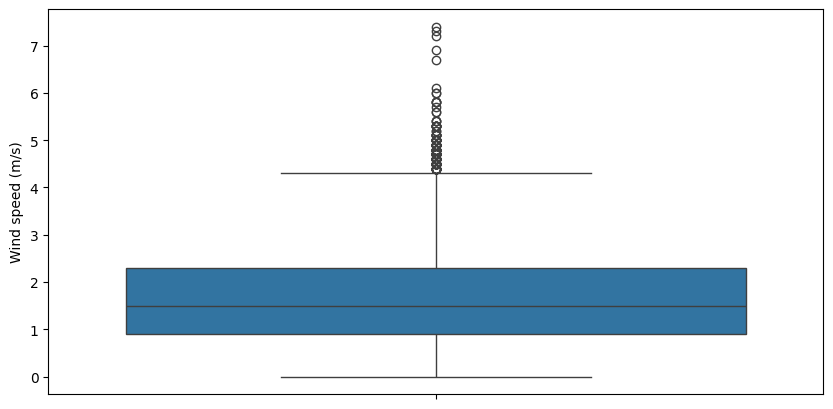

In [328]:
sns.boxplot(dataset['Wind speed (m/s)'])
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see that windspeed is correlated with Demand with the correlation coeficeint of +.12 indicating no significant linear relationship between demand and windspeed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No significant relationship between demand and windspeed.

#### Chart - 12 Rented Bike Count with Visibility.

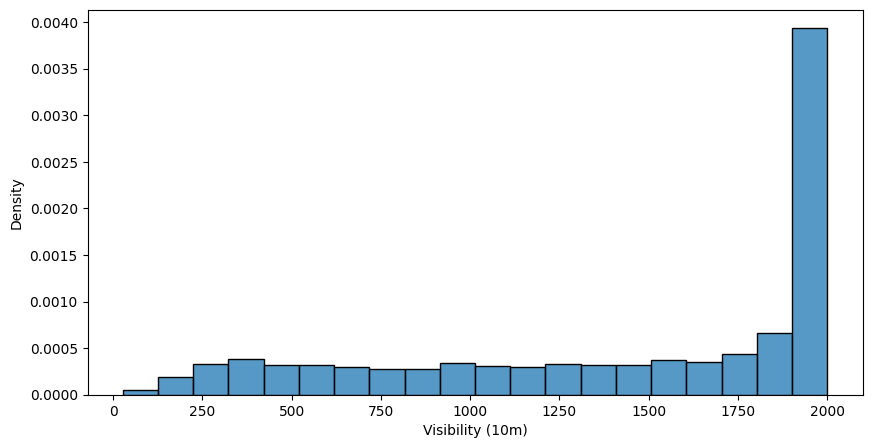

In [329]:
# Chart - 11 visualization code
sns.histplot(x= dataset['Visibility (10m)'],stat='density')
plt.show()

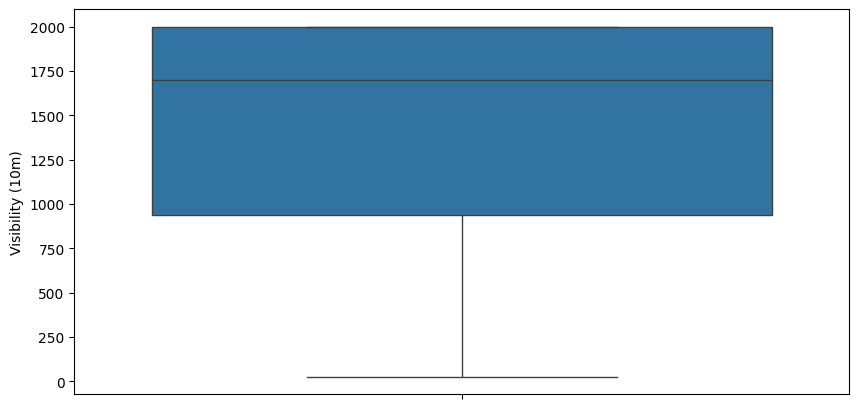

In [330]:
sns.boxplot(dataset['Visibility (10m)'])
plt.show()

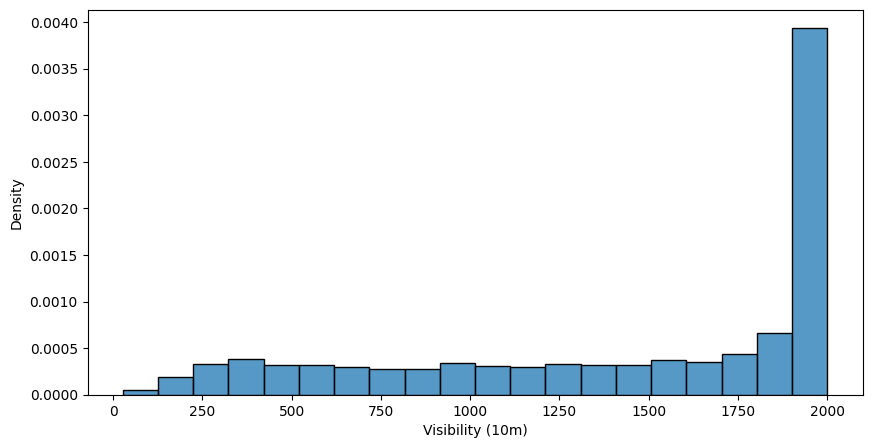

In [331]:
sns.histplot(x= dataset['Visibility (10m)'],stat='density')
plt.show()

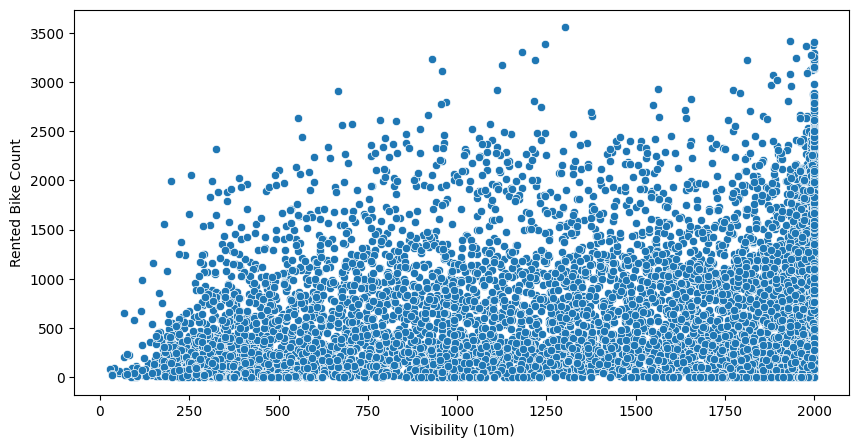

In [332]:
# Chart - 12 visualization code
sns.scatterplot(data = dataset, x = 'Visibility (10m)', y = 'Rented Bike Count')
plt.show()

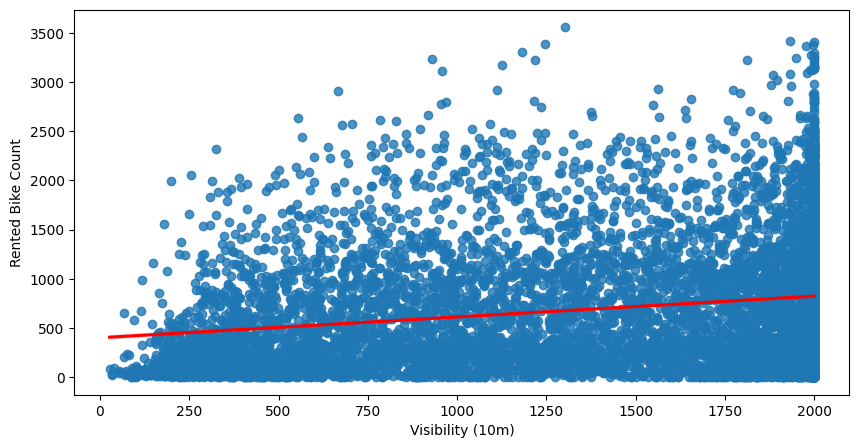

In [333]:
sns.regplot(data = dataset, x = 'Visibility (10m)', y = 'Rented Bike Count',line_kws={"color": "red"})
plt.show()

In [334]:
corr_visibility_demand = dataset['Visibility (10m)'].corr(dataset['Rented Bike Count'])
print(corr_visibility_demand)

0.19928029673135897


##### 1. Why did you pick the specific chart?

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see that Visibility is correlated with Demand with the correlation coeficeint of +.2 indicating no significant linear relationship between demand and Visibility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No significant relationship between demand and Visibility.

#### Chart - 13 Rented Bike Count with Solar Radiation.

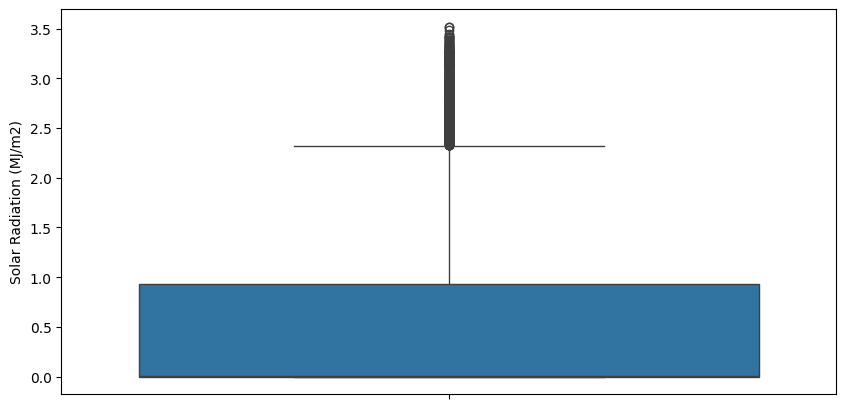

In [335]:
sns.boxplot(dataset['Solar Radiation (MJ/m2)'])
plt.show()

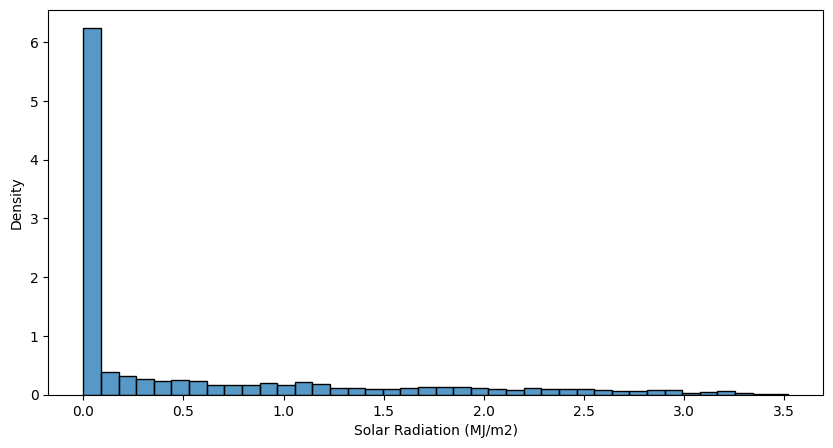

In [336]:
# Chart - 13 visualization code
sns.histplot(x= dataset['Solar Radiation (MJ/m2)'],stat='density')
plt.show()

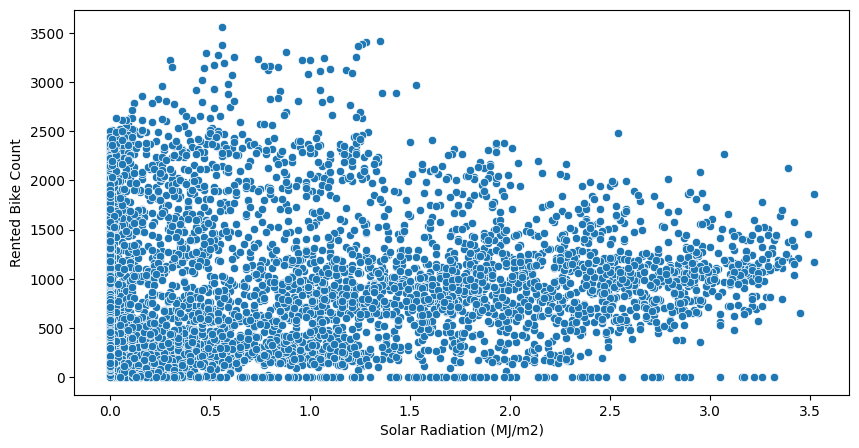

In [337]:
sns.scatterplot(data = dataset, x = 'Solar Radiation (MJ/m2)', y = 'Rented Bike Count')
plt.show()

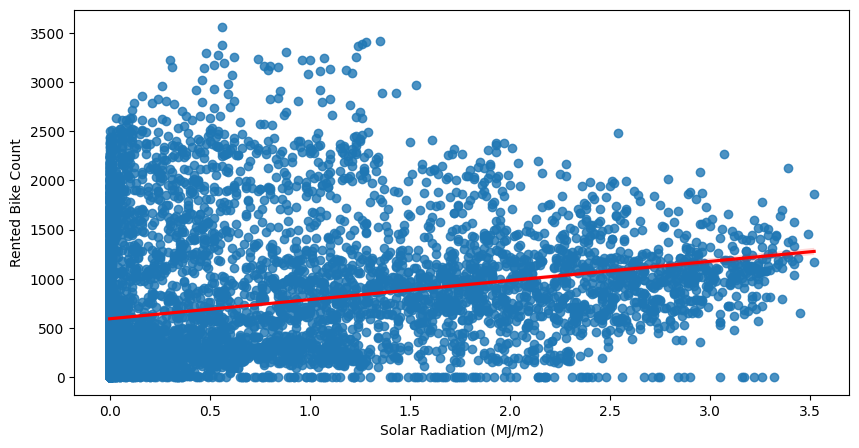

In [338]:
sns.regplot(data = dataset, x = 'Solar Radiation (MJ/m2)', y = 'Rented Bike Count',line_kws={"color": "red"})
plt.show()

In [339]:
corr_radiation_demand = dataset['Solar Radiation (MJ/m2)'].corr(dataset['Rented Bike Count'])
print(corr_radiation_demand)

0.261836985509591


##### 1. Why did you pick the specific chart?

A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another.

The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analysis.

##### 2. What is/are the insight(s) found from the chart?

We can see that Solar Radiation is correlated with Demand with the correlation coeficeint of +.26 indicating weak linear relationship between demand and Solar Radiation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can see that Solar Radiation is correlated with Demand with the correlation coeficeint of +.26 indicating weak linear relationship between demand and Solar Radiation.

#### Chart - 14 - Correlation Heatmap

In [340]:
cor_dataset = dataset[['Rented Bike Count','Temperature(°C)','Humidity(%)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Wind speed (m/s)']]

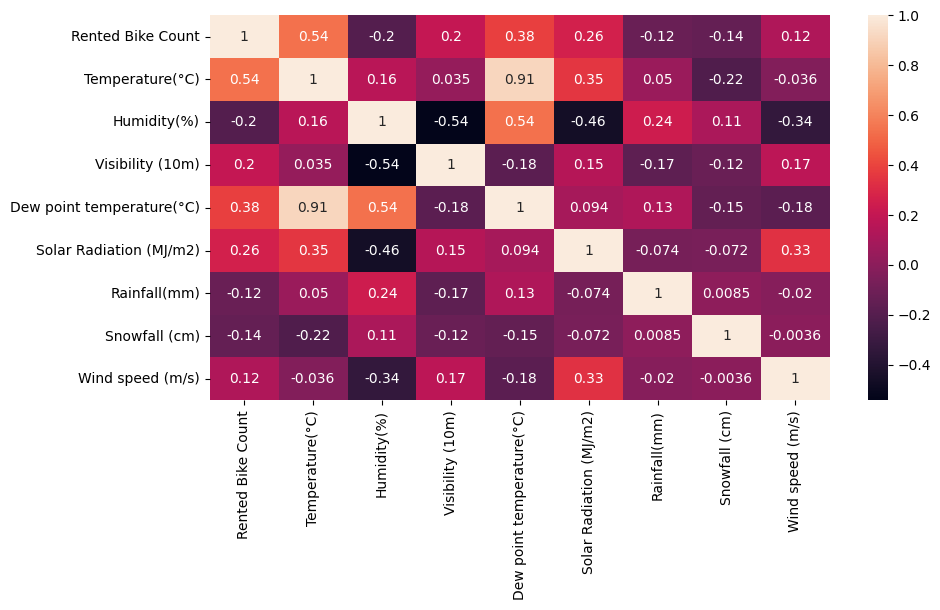

In [341]:
# Correlation Heatmap visualization code
sns.heatmap(data = cor_dataset.corr(),annot = True)
plt.show()

##### 1. Why did you pick the specific chart?

The heatmap function generates a colour-coded matrix that illustrates how strongly two or more of variables in a dataset correlate with one another.

##### 2. What is/are the insight(s) found from the chart?

From above the above dataset we can see that highest postively correlated feature are Temperature and Dew point temperature with correlation coefficiently of 0.91.

With least Coefficient of correlation i.e -0.02 Rainfall and Wind speed are least co-related features.

#### Chart - 15 - Pair Plot

In [342]:
pairplot_dataset = dataset[['Rented Bike Count','Temperature(°C)','Solar Radiation (MJ/m2)','Snowfall (cm)']]

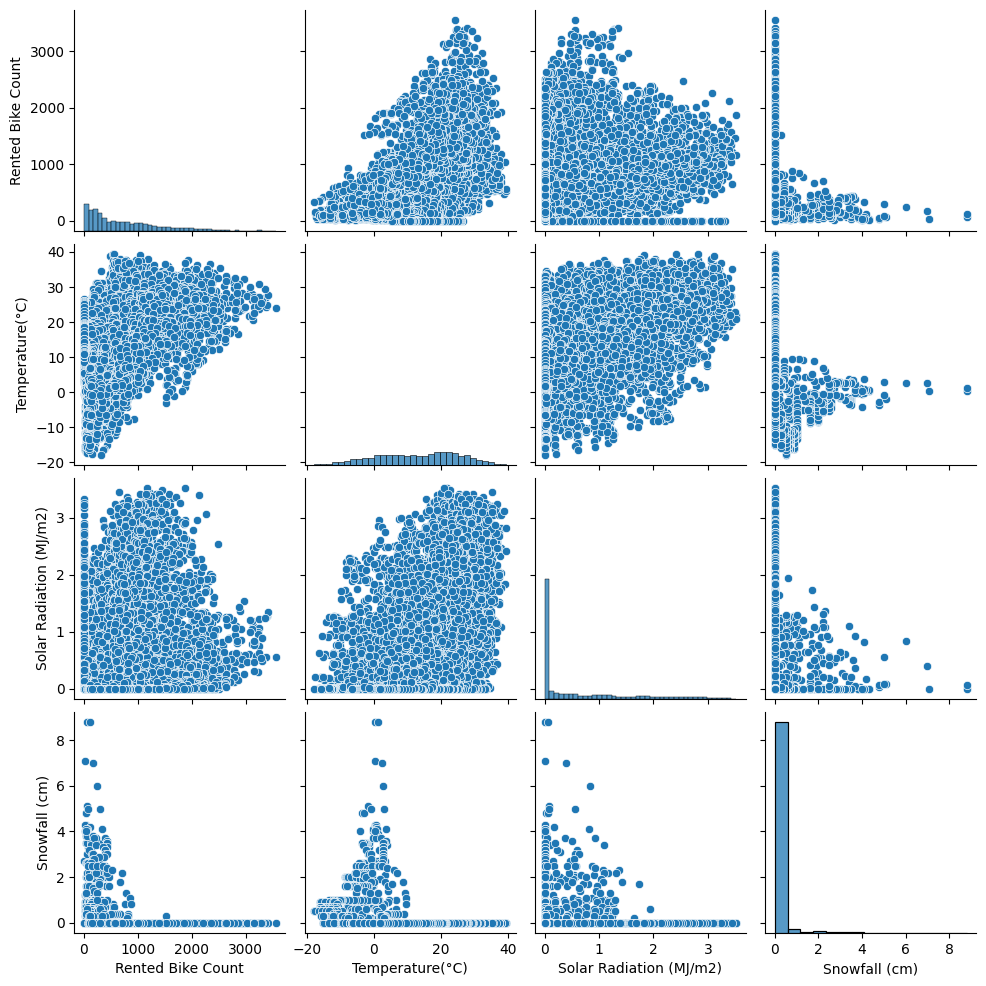

In [343]:
# Pair Plot visualization code
sns.pairplot(data = pairplot_dataset)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two or more variables or to form the most separated clusters

#### Checking Multicollinearity Using VIF

In [344]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [345]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [346]:
dataset.describe().columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'Holiday_cont', 'Functioning Day_cont'],
      dtype='object')

In [347]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Hour','Rented Bike Count','Holiday','Functioning Day','Date','month','Holiday_cont', 'Functioning Day_cont']]])

variables        VIF
0            Temperature(°C)  29.075866
1                Humidity(%)   5.069743
2           Wind speed (m/s)   4.517664
3           Visibility (10m)   9.051931
4  Dew point temperature(°C)  15.201989
5    Solar Radiation (MJ/m2)   2.821604
6               Rainfall(mm)   1.079919
7              Snowfall (cm)   1.118903

##### 1. What is/are the insight(s) found from the chart?

VIF for Temperature(°C) and Dew point temperature(°C) is very high

**Implications of High VIF**

1. A high VIF indicates that the independent variable contributes redundant information to the model.
2. It inflates the standard errors of coefficients, reducing their statistical significance.
3. This makes it challenging to interpret the effect of individual predictors.

**How to Address High VIF**

1. Remove Variables: Eliminate one of the correlated variables.
2. Combine Variables: Create a composite variable (e.g., by averaging or principal component analysis).
3. Regularization Techniques: Use methods like Ridge Regression or Lasso Regression that penalize large coefficients.
4. Center Variables: Standardize the variables (e.g., subtract the mean), which can sometimes reduce multicollinearity.


By identifying and addressing high VIF values, you can improve the reliability and interpretability of your regression model.

In [348]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Hour','Rented Bike Count','Holiday','Functioning Day','Date','month','Holiday_cont', 'Functioning Day_cont','Dew point temperature(°C)']]])

variables       VIF
0          Temperature(°C)  3.166007
1              Humidity(%)  4.758651
2         Wind speed (m/s)  4.079926
3         Visibility (10m)  4.409448
4  Solar Radiation (MJ/m2)  2.246238
5             Rainfall(mm)  1.078501
6            Snowfall (cm)  1.118901

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Demands always be +ve or zero

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

In summers no heavy snowfall

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [349]:
# Handling Missing Values & Missing Value Imputation
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Rainfall_cat                 0
Hour_cat                     0
month                        0
day                          0
Weekday/weekend              0
Holiday_cont                 0
Functioning Day_cont         0
snowfall_cat                 0
dtype: int64

In [350]:
dataset.isnull().sum().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

Dataset do not have any missing value

### 2. Handling Outliers

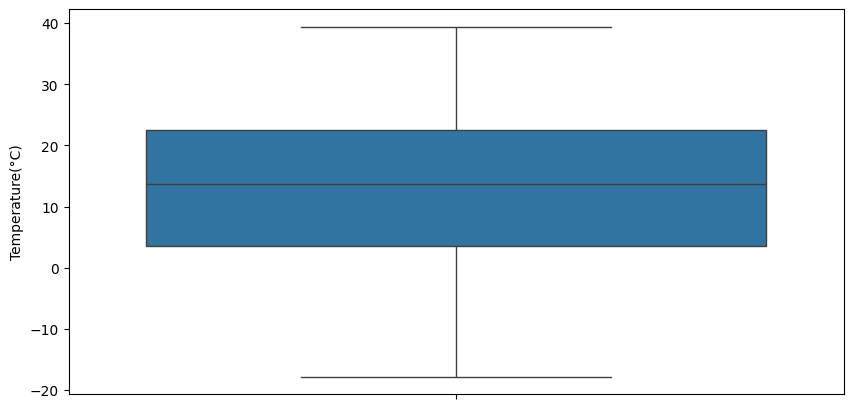

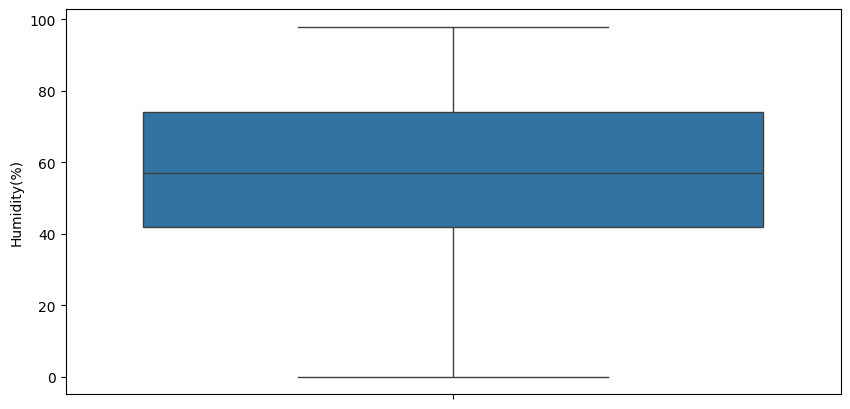

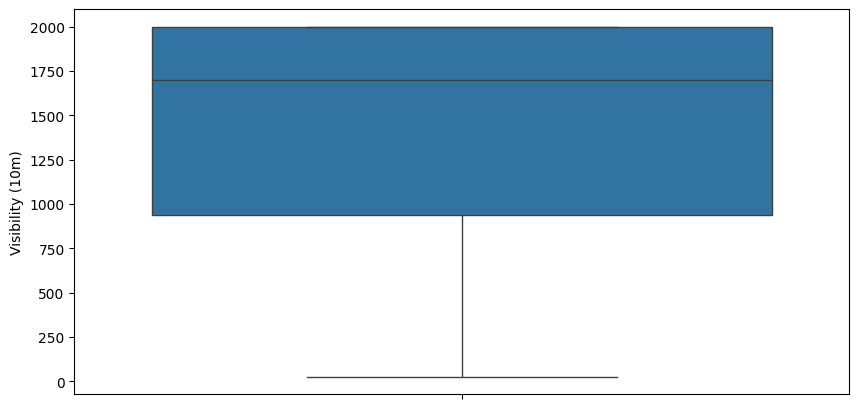

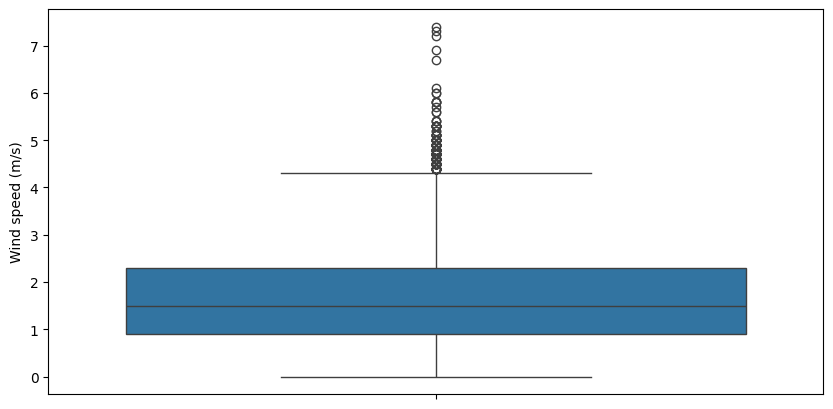

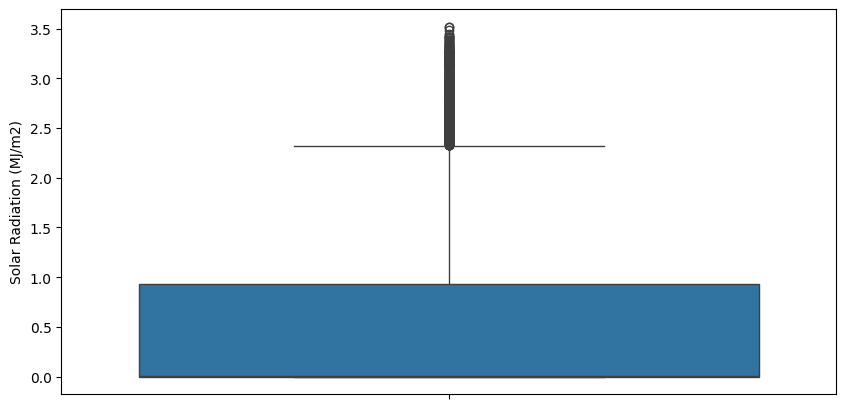

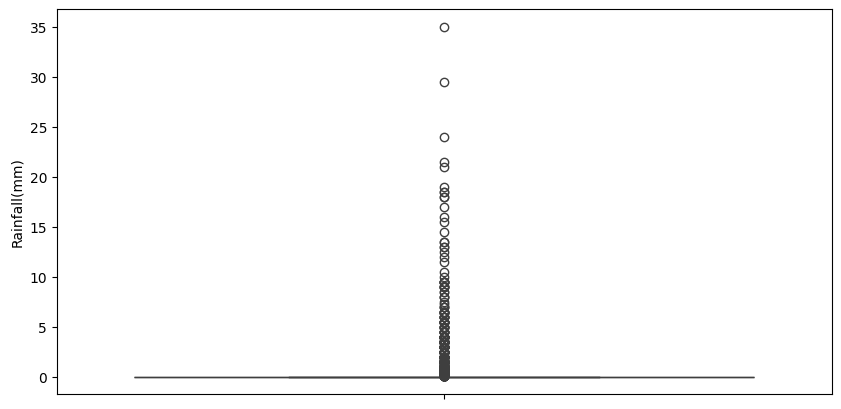

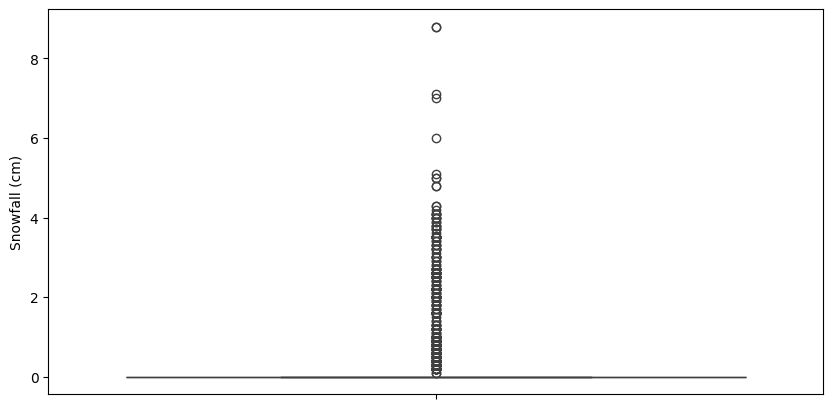

In [351]:
Numerical_columns = ['Temperature(°C)','Humidity(%)','Visibility (10m)','Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
for col in Numerical_columns:
  sns.boxplot(dataset[col])
  plt.show()

In [352]:
#checking IQR for Rainfall and Windspeed
print('IQR for Rainfall is :',upper_limit(dataset,'Rainfall(mm)'))
print('IQR for Snowfall is :',upper_limit(dataset,'Snowfall (cm)'))
print('IQR for Rainfall and snowfall is 0')

IQR for Rainfall is : 0.0
IQR for Snowfall is : 0.0
IQR for Rainfall and snowfall is 0


In [353]:
#checking maximum values of features based on IQR
print('upper limit or max limit for Wind speed is :',upper_limit(dataset,'Wind speed (m/s)'))
print('upper limit or max limit for Solar Radiation is :',upper_limit(dataset,'Solar Radiation (MJ/m2)'))

upper limit or max limit for Wind speed is : 4.3999999999999995
upper limit or max limit for Solar Radiation is : 2.325


Out of 7 features, 4 features contain outliers.
1. For Rainfall value 99% obseravtion are under 4mm/hr. Therefore setting max limit for rainfall 4mm/hr.
2. For Snowfall value 99% obseravtion are under 2.5mm/hr. Therefore setting max limit for rainfall 2.5mm/hr.
3. For windspeed, Setting the upper limit to be 4.4m/s.
4. For Solar Radiation, Setting the upper limit to be 2.325(MJ/m2).

In [354]:
# Handling Outliers & Outlier treatments
dataset['Rainfall(mm)'] = dataset['Rainfall(mm)'].apply(lambda x : 4 if x > 4 else x)
dataset['Snowfall (cm)'] = dataset['Snowfall (cm)'].apply(lambda x : 2.5 if x > 2.5 else x)
dataset['Wind speed (m/s)'] = dataset['Wind speed (m/s)'].apply(lambda x : 4.3 if x > 4.3 else x)
dataset['Solar Radiation (MJ/m2)'] = dataset['Solar Radiation (MJ/m2)'].apply(lambda x : 2.325 if x > 2.325 else x)


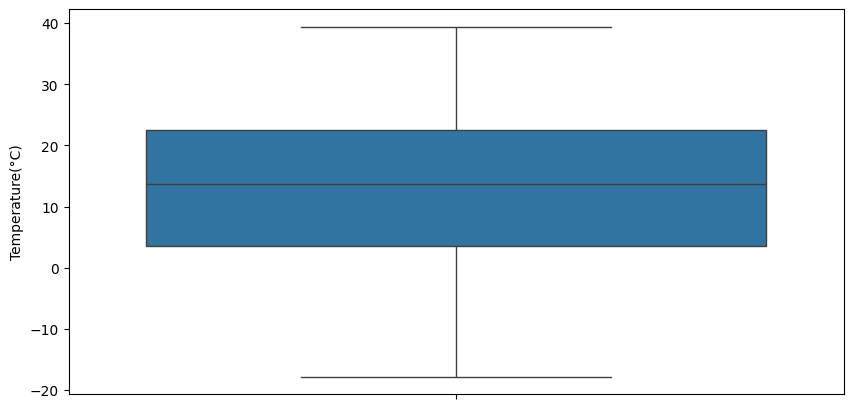

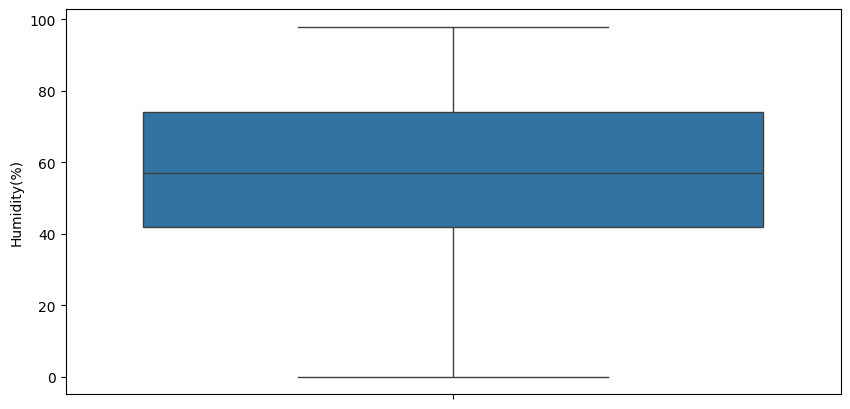

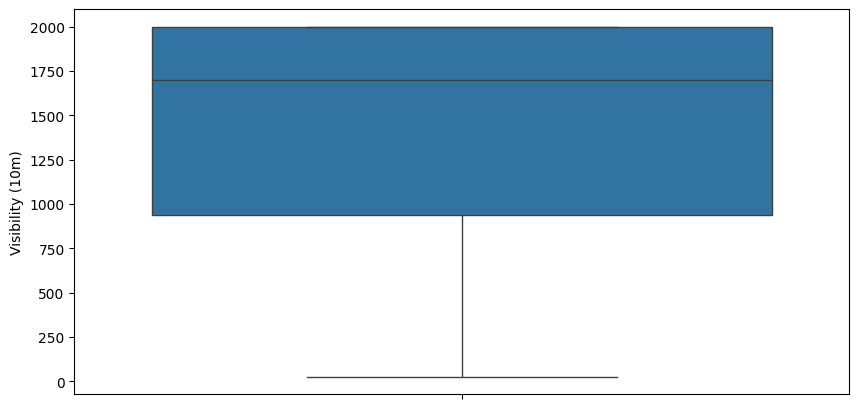

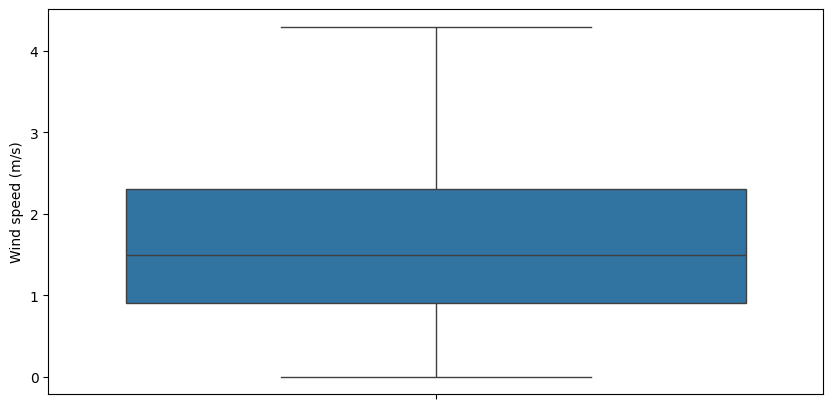

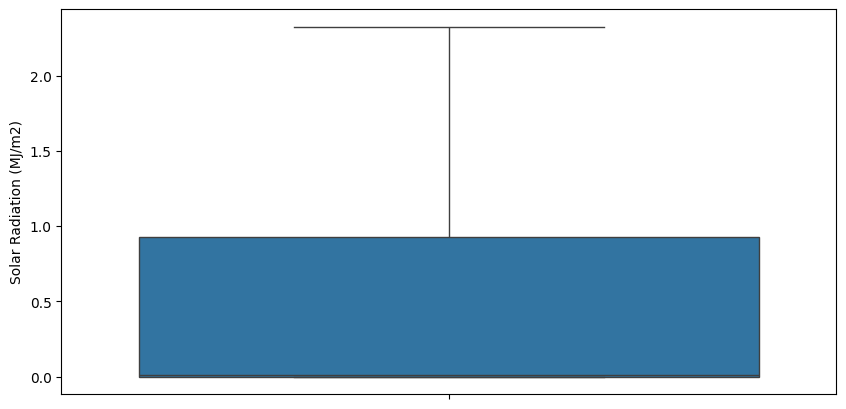

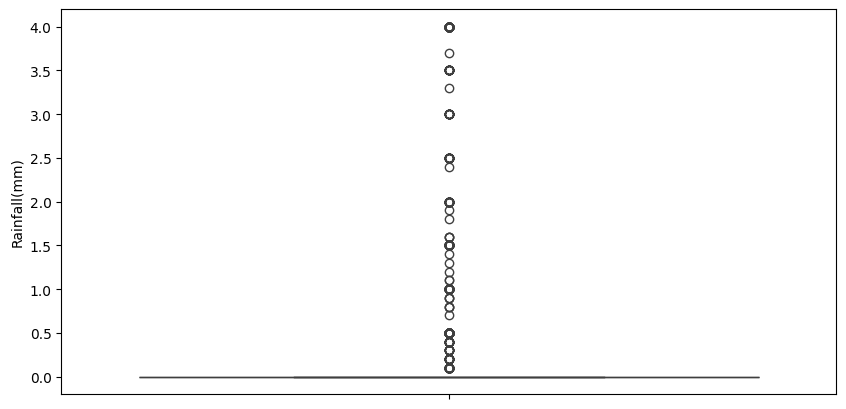

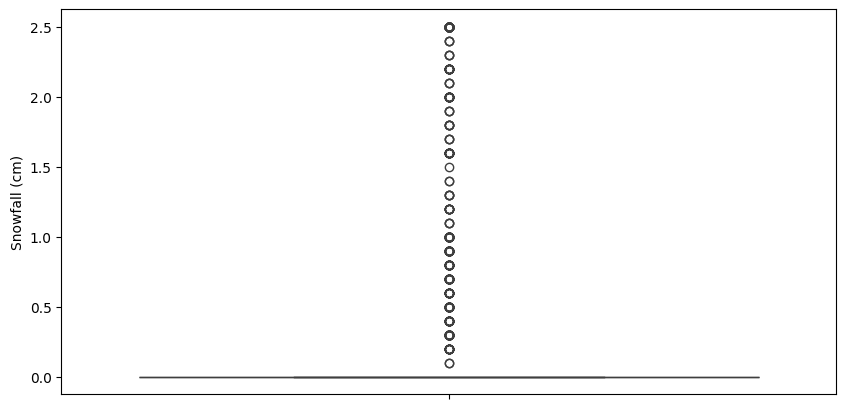

In [355]:
Numerical_columns = ['Temperature(°C)','Humidity(%)','Visibility (10m)','Wind speed (m/s)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
for col in Numerical_columns:
  sns.boxplot(dataset[col])
  plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

**Capping**

In this technique called “outlier detection,” we cap our data to set limits. For instance, if we decide on a specific value, any data point above or below that value is considered an outlier. The number of outliers in the dataset then gives us insight into that capping number. It’s like setting a boundary and saying, “Anything beyond this point is unusual,” and by doing so, we identify and count the outliers in our data.

For example, if you’re working on the income feature, you might find that people above a certain income level behave similarly to those with a lower income. In this case, you can cap the income value at a level that keeps that intact and accordingly treat the outliers.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

Among all the below transformation, Square root transformation is best suited to tranform data into normal distribution.

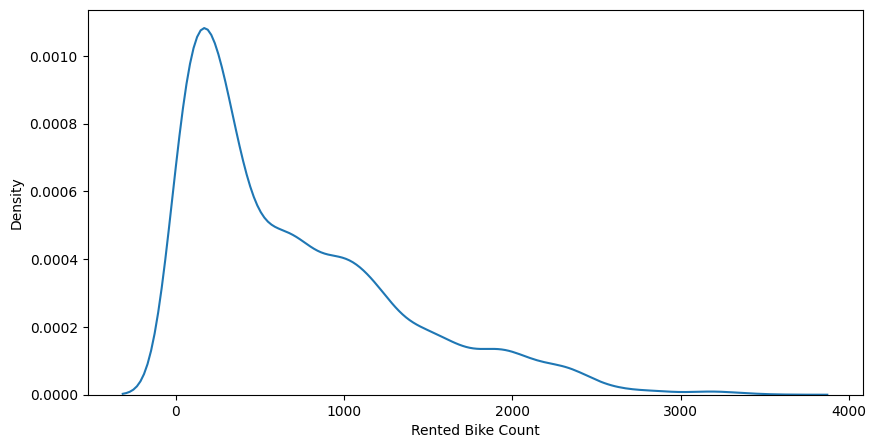

In [356]:
sns.kdeplot(x= dataset['Rented Bike Count'])
plt.show()

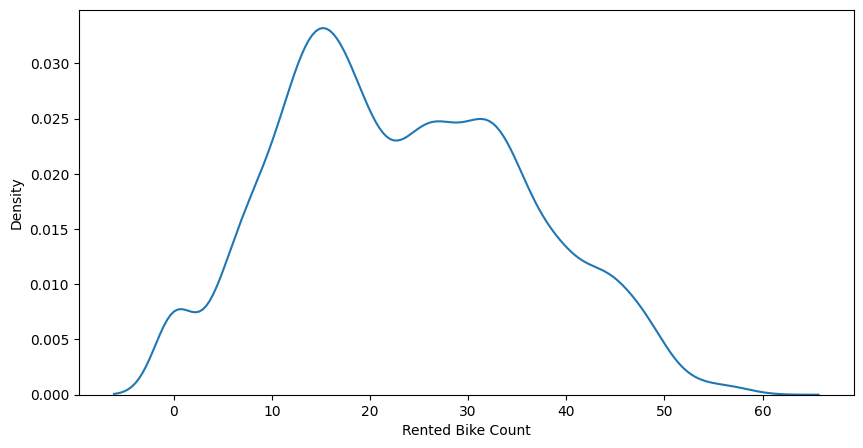

In [357]:
#sqaure root transformation
sns.kdeplot(x= np.sqrt(dataset['Rented Bike Count']))
plt.show()

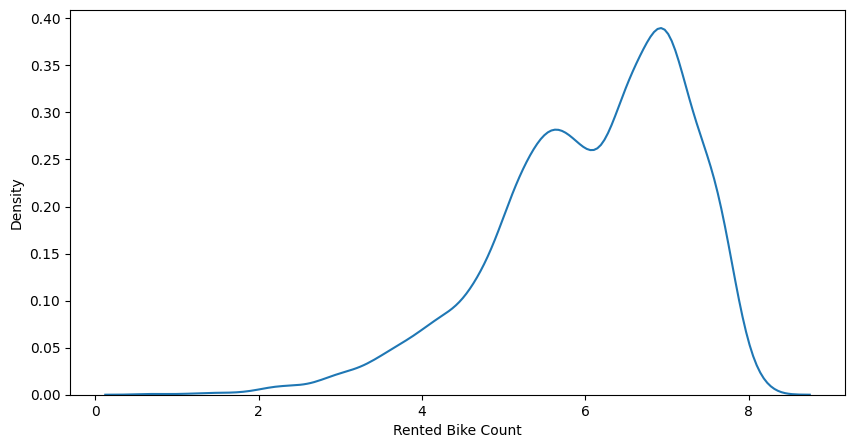

In [358]:
#Log Transformation
sns.kdeplot(x= np.log(dataset['Rented Bike Count']))
plt.show()

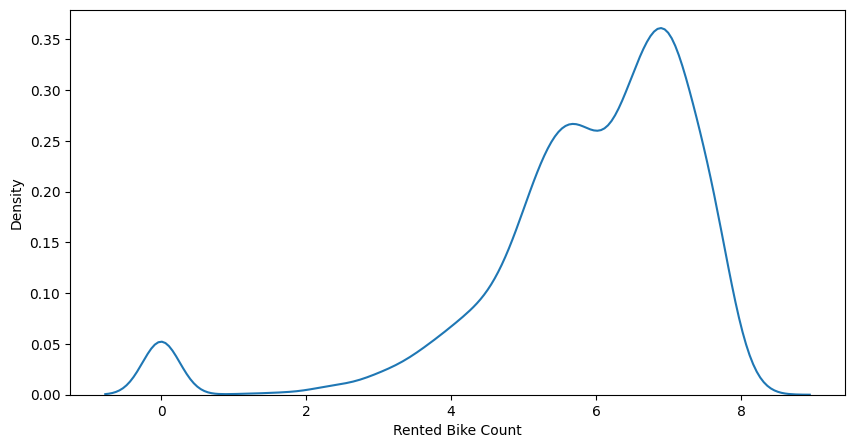

In [359]:
#Log Transformation
sns.kdeplot(x= np.log(dataset['Rented Bike Count']+1))
plt.show()

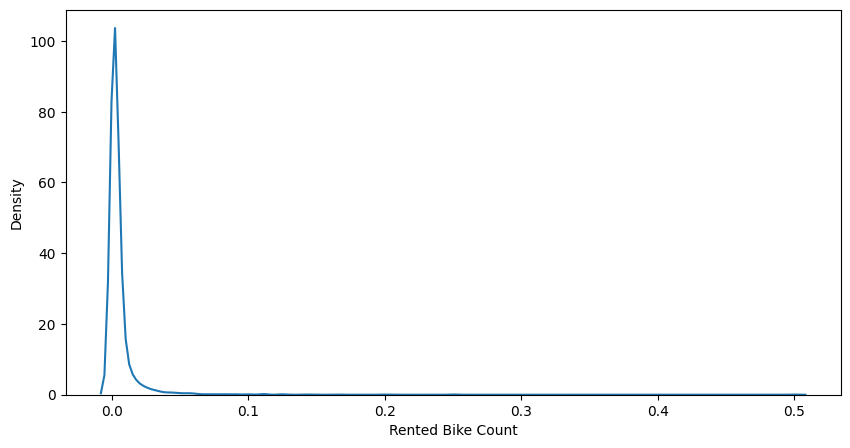

In [360]:
#Inverse Transformation
sns.kdeplot(x= 1/(dataset['Rented Bike Count']))
plt.show()

In [361]:
dataset['Rented Bike Count'] = np.sqrt(dataset['Rented Bike Count'])

Converting data in holiday and functional day, so we can do categorical encoding more effectively.

In [362]:
dataset['Holiday'].replace({0:'No_Holiday',1:'Holiday'},inplace = True)
dataset['Functioning Day'].replace({0:'Not_functional',1:'Functional'},inplace = True)

Changing data types

In [363]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   float64       
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [364]:
categorical_col = ['Holiday','Functioning Day','Weekday/weekend','Seasons','Hour']
for x in categorical_col:
  dataset[x] = dataset[x].astype('category')

The category data type in Pandas is a special data type for categorical data, which typically represents a fixed number of possible values or categories. It is an optimized data type compared to the default object or string data type, especially useful when working with large datasets.

Features of the category Data Type:

1. Memory Efficient.
2. Improved Performance.
3. Supports Order.
4. Useful for Fixed Categories.

In [365]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   float64       
 2   Hour                       8760 non-null   category      
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   category      
 12  Holida

#### 2. Feature Selection

In [366]:
# Select your features wisely to avoid overfitting
dataset_fit1 = dataset[['Rented Bike Count','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)','Weekday/weekend','Seasons','Hour','Holiday','Functioning Day','month']]

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 4. Categorical Encoding

In [367]:
categorical_columns = ['Hour','Holiday','Weekday/weekend','Seasons','Functioning Day','month']

In [368]:
dataset_fit1

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0             15.937377             -5.2           37               2.2   
1             14.282857             -5.5           38               0.8   
2             13.152946             -6.0           39               1.0   
3             10.344080             -6.2           40               0.9   
4              8.831761             -6.0           36               2.3   
...                 ...              ...          ...               ...   
8755          31.670175              4.2           34               2.6   
8756          27.640550              3.4           37               2.3   
8757          26.343880              2.6           39               0.3   
8758          26.683328              2.1           41               1.0   
8759          24.166092              1.9           43               1.3   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                 2000                      0.0           0.0            0.0   
1                 2000                      0.0           0.0            0.0   
2                 2000                      0.0           0.0            0.0   
3                 2000                      0.0           0.0            0.0   
4                 2000                      0.0           0.0            0.0   
...                ...                      ...           ...            ...   
8755              1894                      0.0           0.0            0.0   
8756              2000                      0.0           0.0            0.0   
8757              1968                      0.0           0.0            0.0   
8758              1859                      0.0           0.0            0.0   
8759              1909                      0.0           0.0            0.0   

     Weekday/weekend Seasons Hour     Holiday Functioning Day  month  
0            Weekday  Winter    0  No Holiday             Yes     12  
1            Weekday  Winter    1  No Holiday             Yes     12  
2            Weekday  Winter    2  No Holiday             Yes     12  
3            Weekday  Winter    3  No Holiday             Yes     12  
4            Weekday  Winter    4  No Holiday             Yes     12  
...              ...     ...  ...         ...             ...    ...  
8755         Weekday  Autumn   19  No Holiday             Yes     11  
8756         Weekday  Autumn   20  No Holiday             Yes     11  
8757         Weekday  Autumn   21  No Holiday             Yes     11  
8758         Weekday  Autumn   22  No Holiday             Yes     11  
8759         Weekday  Autumn   23  No Holiday             Yes     11  

[8760 rows x 14 columns]

In [369]:
# Encode your categorical columns
for col in categorical_columns:
    dataset_fit1 = one_hot_encoding(dataset_fit1, col)


In [370]:
dataset_fit1

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0             15.937377             -5.2           37               2.2   
1             14.282857             -5.5           38               0.8   
2             13.152946             -6.0           39               1.0   
3             10.344080             -6.2           40               0.9   
4              8.831761             -6.0           36               2.3   
...                 ...              ...          ...               ...   
8755          31.670175              4.2           34               2.6   
8756          27.640550              3.4           37               2.3   
8757          26.343880              2.6           39               0.3   
8758          26.683328              2.1           41               1.0   
8759          24.166092              1.9           43               1.3   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                 2000                      0.0           0.0            0.0   
1                 2000                      0.0           0.0            0.0   
2                 2000                      0.0           0.0            0.0   
3                 2000                      0.0           0.0            0.0   
4                 2000                      0.0           0.0            0.0   
...                ...                      ...           ...            ...   
8755              1894                      0.0           0.0            0.0   
8756              2000                      0.0           0.0            0.0   
8757              1968                      0.0           0.0            0.0   
8758              1859                      0.0           0.0            0.0   
8759              1909                      0.0           0.0            0.0   

      Hour_0  Hour_1  Hour_2  Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  \
0          1       0       0       0       0       0       0       0       0   
1          0       1       0       0       0       0       0       0       0   
2          0       0       1       0       0       0       0       0       0   
3          0       0       0       1       0       0       0       0       0   
4          0       0       0       0       1       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8755       0       0       0       0       0       0       0       0       0   
8756       0       0       0       0       0       0       0       0       0   
8757       0       0       0       0       0       0       0       0       0   
8758       0       0       0       0       0       0       0       0       0   
8759       0       0       0       0       0       0       0       0       0   

      Hour_9  Hour_10  Hour_11  Hour_12  Hour_13  Hour_14  Hour_15  Hour_16  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
8755       0        0        0        0        0        0        0        0   
8756       0        0        0        0        0        0        0        0   
8757       0        0        0        0        0        0        0        0   
8758       0        0        0        0        0        0        0        0   
8759       0        0        0        0        0        0        0        0   

      Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  \
0           0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0   
2           0        

#### What all categorical encoding techniques have you used & why did you use those techniques?

**One Hot Encoding**

One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

### 5. Data Scaling

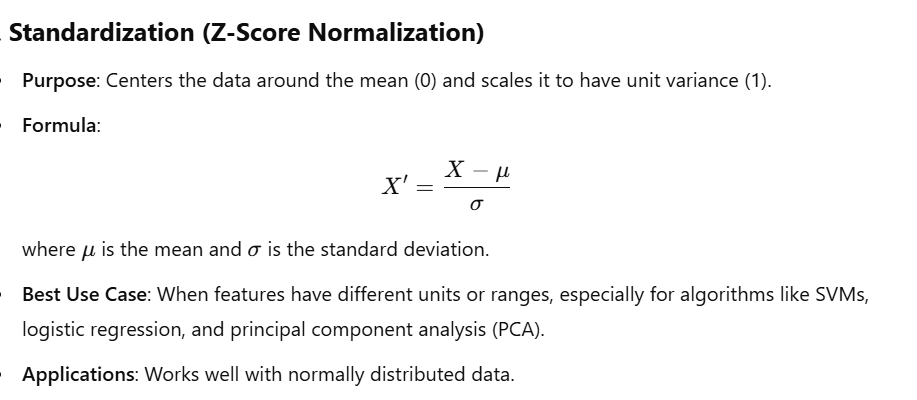

In [371]:
from sklearn.preprocessing import StandardScaler

def standardize_columns(data, columns):
    """
    Standardizes specified columns in the DataFrame using Z-Score Normalization.

    Parameters:
        data (pd.DataFrame): Input DataFrame.
        columns (list): List of column names to be standardized.

    Returns:
        pd.DataFrame: DataFrame with standardized columns.
    """
    scaler = StandardScaler()  # Initialize the scaler
    data[columns] = scaler.fit_transform(data[columns])  # Apply standardization
    return data

In [372]:
columns = ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
dataset_fit1 = standardize_columns(dataset_fit1, columns)

In [373]:
dataset_fit1

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0             15.937377        -1.513957    -1.042483          0.484240   
1             14.282857        -1.539074    -0.993370         -0.911136   
2             13.152946        -1.580936    -0.944257         -0.711797   
3             10.344080        -1.597680    -0.895144         -0.811467   
4              8.831761        -1.580936    -1.091596          0.583910   
...                 ...              ...          ...               ...   
8755          31.670175        -0.726961    -1.189822          0.882919   
8756          27.640550        -0.793939    -1.042483          0.583910   
8757          26.343880        -0.860918    -0.944257         -1.409485   
8758          26.683328        -0.902779    -0.846031         -0.711797   
8759          24.166092        -0.919524    -0.747806         -0.412788   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0             0.925871                -0.682824      -0.18972      -0.191835   
1             0.925871                -0.682824      -0.18972      -0.191835   
2             0.925871                -0.682824      -0.18972      -0.191835   
3             0.925871                -0.682824      -0.18972      -0.191835   
4             0.925871                -0.682824      -0.18972      -0.191835   
...                ...                      ...           ...            ...   
8755          0.751605                -0.682824      -0.18972      -0.191835   
8756          0.925871                -0.682824      -0.18972      -0.191835   
8757          0.873263                -0.682824      -0.18972      -0.191835   
8758          0.694064                -0.682824      -0.18972      -0.191835   
8759          0.776265                -0.682824      -0.18972      -0.191835   

      Hour_0  Hour_1  Hour_2  Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  \
0          1       0       0       0       0       0       0       0       0   
1          0       1       0       0       0       0       0       0       0   
2          0       0       1       0       0       0       0       0       0   
3          0       0       0       1       0       0       0       0       0   
4          0       0       0       0       1       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8755       0       0       0       0       0       0       0       0       0   
8756       0       0       0       0       0       0       0       0       0   
8757       0       0       0       0       0       0       0       0       0   
8758       0       0       0       0       0       0       0       0       0   
8759       0       0       0       0       0       0       0       0       0   

      Hour_9  Hour_10  Hour_11  Hour_12  Hour_13  Hour_14  Hour_15  Hour_16  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
...      ...      ...      ...      ...      ...      ...      ...      ...   
8755       0        0        0        0        0        0        0        0   
8756       0        0        0        0        0        0        0        0   
8757       0        0        0        0        0        0        0        0   
8758       0        0        0        0        0        0        0        0   
8759       0        0        0        0        0        0        0        0   

      Hour_17  Hour_18  Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  \
0           0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0   
2           0        

##### Which method have you used to scale you data and why?

### 6. Data Splitting

In [374]:
X = dataset_fit1.drop(['Rented Bike Count'],axis = 'columns')
X

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
0           -1.513957    -1.042483          0.484240          0.925871   
1           -1.539074    -0.993370         -0.911136          0.925871   
2           -1.580936    -0.944257         -0.711797          0.925871   
3           -1.597680    -0.895144         -0.811467          0.925871   
4           -1.580936    -1.091596          0.583910          0.925871   
...               ...          ...               ...               ...   
8755        -0.726961    -1.189822          0.882919          0.751605   
8756        -0.793939    -1.042483          0.583910          0.925871   
8757        -0.860918    -0.944257         -1.409485          0.873263   
8758        -0.902779    -0.846031         -0.711797          0.694064   
8759        -0.919524    -0.747806         -0.412788          0.776265   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Hour_0  Hour_1  \
0                   -0.682824      -0.18972      -0.191835       1       0   
1                   -0.682824      -0.18972      -0.191835       0       1   
2                   -0.682824      -0.18972      -0.191835       0       0   
3                   -0.682824      -0.18972      -0.191835       0       0   
4                   -0.682824      -0.18972      -0.191835       0       0   
...                       ...           ...            ...     ...     ...   
8755                -0.682824      -0.18972      -0.191835       0       0   
8756                -0.682824      -0.18972      -0.191835       0       0   
8757                -0.682824      -0.18972      -0.191835       0       0   
8758                -0.682824      -0.18972      -0.191835       0       0   
8759                -0.682824      -0.18972      -0.191835       0       0   

      Hour_2  Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  Hour_9  Hour_10  \
0          0       0       0       0       0       0       0       0        0   
1          0       0       0       0       0       0       0       0        0   
2          1       0       0       0       0       0       0       0        0   
3          0       1       0       0       0       0       0       0        0   
4          0       0       1       0       0       0       0       0        0   
...      ...     ...     ...     ...     ...     ...     ...     ...      ...   
8755       0       0       0       0       0       0       0       0        0   
8756       0       0       0       0       0       0       0       0        0   
8757       0       0       0       0       0       0       0       0        0   
8758       0       0       0       0       0       0       0       0        0   
8759       0       0       0       0       0       0       0       0        0   

      Hour_11  Hour_12  Hour_13  Hour_14  Hour_15  Hour_16  Hour_17  Hour_18  \
0           0        0        0        0        0        0        0        0   
1           0        0        0        0        0        0        0        0   
2           0        0        0        0        0        0        0        0   
3           0        0        0        0        0        0        0        0   
4           0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
8755        0        0        0        0        0        0        0        0   
8756        0        0        0        0        0        0        0        0   
8757        0        0        0        0        0        0        0        0   
8758        0        0        0        0        0        0        0        0   
8759        0        0        0        0        0        0        0        0   

      Hour_19  Hour_20  Hour_21  Hour_22  Hour_23  Holiday_Holiday  \
0           0        0        0        0        0                0   
1           0        0        0        0        0                0   
2           0        0        0     

In [375]:
y = dataset_fit1['Rented Bike Count']
y

0       15.937377
1       14.282857
2       13.152946
3       10.344080
4        8.831761
          ...    
8755    31.670175
8756    27.640550
8757    26.343880
8758    26.683328
8759    24.166092
Name: Rented Bike Count, Length: 8760, dtype: float64

In [376]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(7008, 53)
(1752, 53)


##### What data splitting ratio have you used and why?

We used spliting ratio of 0.2.

## ***7. ML Model Implementation***

### ML Model - 1 : Linear Regression

In [377]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)


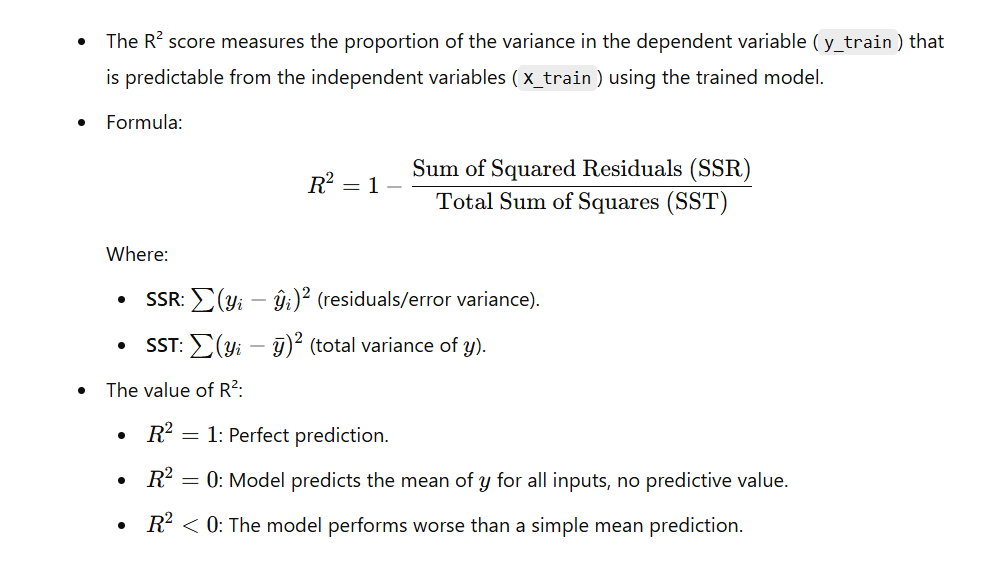

In [378]:
reg.score(X_train, y_train)

0.7937956823223675

In [379]:
reg.score(X_test, y_test)

0.7960701178918613

In [380]:
reg.coef_

array([ 5.59773617e+00, -1.98543175e+00, -1.10657660e-02,  4.98578739e-01,
        8.50097906e-01, -2.64132049e+00, -8.78600720e-02, -6.92529631e-02,
       -2.17078835e+00, -5.04088998e+00, -7.14252159e+00, -9.71040806e+00,
       -9.42298230e+00, -4.28785476e+00,  1.80887438e+00,  7.35965445e+00,
        1.48652617e+00, -3.16395438e+00, -3.23313452e+00, -2.12547535e+00,
       -2.45087907e+00, -2.37953625e+00, -1.23524262e+00,  5.42759624e-01,
        4.33388469e+00,  1.07319738e+01,  7.14263542e+00,  6.05846746e+00,
        6.35920014e+00,  5.10089467e+00,  1.50804936e+00, -1.68633635e+00,
        1.68633635e+00,  6.92447004e-01, -6.92447004e-01,  2.48925919e+00,
        4.01135595e-01, -2.39551206e-02, -2.86643966e+00, -1.42212997e+01,
        1.42212997e+01, -1.40114719e+00, -2.08356439e+00, -1.75877814e+00,
       -1.18989328e-01,  2.27890307e+00,  4.57292381e+00, -1.23360903e+00,
       -3.36326989e+00, -5.39713993e-01,  2.18649984e+00,  8.42473340e-01,
        6.18271910e-01])

In [381]:
reg.intercept_

8.395523426504717

In [382]:
list_of_col = X.columns.to_list()
coeff = reg.coef_
intercept_list = [ round(x,2) for x in coeff ]

In [383]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [384]:
print(y_pred_train)
print(y_pred_test)

[16.57890163 41.03299687 27.30011359 ... 34.39268492 23.30795282
 22.09429226]
[17.08827589 23.13042569 20.21392523 ... 21.45911866 34.23783244
 27.93755106]


In [385]:
#calculating MSE(Mean Square Error)
MSE_Linear_regression = mean_squared_error((y_train), (y_pred_train))
print("Mean Square Error(MSE):",MSE_Linear_regression)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression=np.sqrt(MSE_Linear_regression)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression)

#calculating MAE(Mean absoute error)
MAE_Linear_regression= mean_absolute_error(y_train, y_pred_train)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression)

#calculating r2 and adjusted r2
r2_Linear_regression= r2_score((y_train), (y_pred_train))
print("R2 :",r2_Linear_regression)
Adjusted_R2_Linear_regression = (1-(1-r2_score((y_train), (y_pred_train)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression)

Mean Square Error(MSE): 31.82415625186716
Root Mean Square Error(RMSE) : 5.6412903002652826
Mean Absoute Error(MAE) : 4.285663069812145
R2 : 0.7937956823223675
Adjusted R2 : 0.7873593873654097


The train set's r2_score is 0.7885. This means our linear model is performing well on the data

In [386]:
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_Linear_regression),2),
       'MSE':round((MSE_Linear_regression),2),
       'RMSE':round((RMSE_Linear_regression),2),
       'R2_score':round((r2_Linear_regression),2),
       'Adjusted R2':round((Adjusted_R2_Linear_regression),2)
       }

train_df_LR=pd.DataFrame(dict1,index = range(1))

In [387]:
#calculating MSE(Mean Square Error)
MSE_Linear_regression = mean_squared_error((y_test), (y_pred_test))
print("Mean Square Error(MSE):",MSE_Linear_regression)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression=np.sqrt(MSE_Linear_regression)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression)

#calculating MAE(Mean absoute error)
MAE_Linear_regression= mean_absolute_error(y_test, y_pred_test)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression)

#calculating r2 and adjusted r2
r2_Linear_regression= r2_score((y_test), (y_pred_test))
print("R2 :",r2_Linear_regression)
Adjusted_R2_Linear_regression = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression)

Mean Square Error(MSE): 32.11615385984664
Root Mean Square Error(RMSE) : 5.667111597617136
Mean Absoute Error(MAE) : 4.307799860436961
R2 : 0.7960701178918613
Adjusted R2 : 0.7897048153290043


The train set's r2_score is 0.7961. This means our linear model is performing well on the data

In [388]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_Linear_regression),2),
       'MSE':round((MSE_Linear_regression),2),
       'RMSE':round((RMSE_Linear_regression),2),
       'R2_score':round((r2_Linear_regression),2),
       'Adjusted R2':round((Adjusted_R2_Linear_regression),2)
       }

test_df_LR=pd.DataFrame(dict2,index = range(1))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [389]:
#checking all the relevant metrics for Linear Regression
train_df_LR

Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.29  31.82  5.64      0.79         0.79

In [390]:
test_df_LR

Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.31  32.12  5.67       0.8         0.79

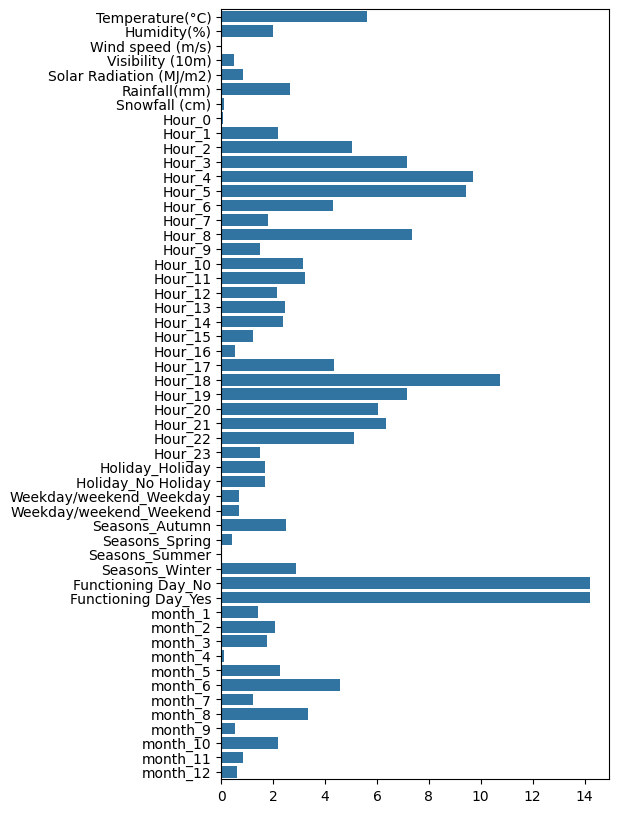

In [391]:
#Importance of respective features
plt.rcParams['figure.figsize'] = (5,10)
y_imf = X.columns.to_list()
x_imf = np.absolute(intercept_list)
sns.barplot(x= x_imf,y = y_imf)
plt.show()

Answer Here.

### ML Model - 2 Lasso Regression

Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

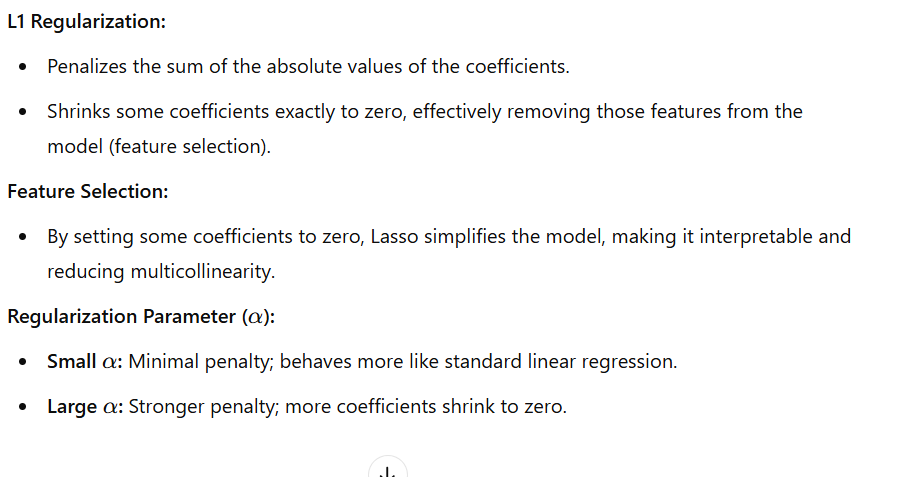

In [392]:
# Create an instance of Lasso Regression implementation
lasso = Lasso(alpha=1.0, max_iter=3000)

# Fit the Lasso model
lasso.fit(X_train, y_train)

Lasso(max_iter=3000)

In [393]:
#checking the score
print('Score for training set is :',lasso.score(X_train, y_train))
print('Score for test set is :',lasso.score(X_test, y_test))

Score for training set is : 0.40742889522111736
Score for test set is : 0.378504636644467


In [394]:
# Checking the predicted values from the lasso model
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [395]:
# Printing the predicted values
print(y_pred_train_lasso)
print(y_pred_test_lasso)

[20.99530317 32.04552614 32.5242477  ... 30.53756631 21.37520343
 18.12800688]
[21.09296251 26.26630742 18.27546523 ... 19.20406784 22.79934474
 21.54077134]


In [396]:
#calculating MSE(Mean Square Error) for train data
MSE_Linear_regression_lasso = mean_squared_error((y_train), (y_pred_train_lasso))
print("Mean Square Error(MSE):",MSE_Linear_regression_lasso)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression_lasso=np.sqrt(MSE_Linear_regression_lasso)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression_lasso)

#calculating MAE(Mean absoute error)
MAE_Linear_regression_lasso= mean_absolute_error(y_train,y_pred_train_lasso)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression_lasso)

#calculating r2 and adjusted r2
r2_Linear_regression_lasso= r2_score((y_train), (y_pred_train_lasso))
print("R2 :",r2_Linear_regression_lasso)
Adjusted_R2_Linear_regression_lasso = (1-(1-r2_score((y_train), (y_pred_train_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression_lasso)

Mean Square Error(MSE): 91.45334899488526
Root Mean Square Error(RMSE) : 9.563124436860855
Mean Absoute Error(MAE) : 7.340092825060288
R2 : 0.40742889522111736
Adjusted R2 : 0.3889328595595857


The train set's r2_score is 0.38. This means our lasso model is not performing well on the data.

In [397]:
dict3 = {'Model': 'Lasso',
         'MAE': round(MAE_Linear_regression_lasso, 2),
         'MSE': round(MSE_Linear_regression_lasso, 2),
         'RMSE': round(RMSE_Linear_regression_lasso, 2),
         'R2_score': round(r2_Linear_regression_lasso, 2),
         'Adjusted R2': round(Adjusted_R2_Linear_regression_lasso, 2)
        }

# Convert the dictionary to a DataFrame and concatenate
train_df_LR = pd.concat([train_df_LR, pd.DataFrame([dict3])], ignore_index=True)

In [398]:
train_df_LR

Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.29  31.82  5.64      0.79         0.79
1               Lasso  7.34  91.45  9.56      0.41         0.39

In [399]:
#calculating MSE(Mean Square Error) for test data
MSE_Linear_regression_lasso = mean_squared_error((y_test), (y_pred_test_lasso))
print("Mean Square Error(MSE):",MSE_Linear_regression_lasso)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression_lasso=np.sqrt(MSE_Linear_regression_lasso)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression_lasso)

#calculating MAE(Mean absoute error)
MAE_Linear_regression_lasso= mean_absolute_error(y_test,y_pred_test_lasso)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression_lasso)

#calculating r2 and adjusted r2
r2_Linear_regression_lasso= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_Linear_regression_lasso)
Adjusted_R2_Linear_regression_lasso = (1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression_lasso)

Mean Square Error(MSE): 97.87697862799382
Root Mean Square Error(RMSE) : 9.893279467800038
Mean Absoute Error(MAE) : 7.572822076734913
R2 : 0.378504636644467
Adjusted R2 : 0.35910578254679726


The train set's r2_score is 0.36. This means our linear model is not performing well on the data.

In [400]:
#Storing
dict4={'Model':'Lasso ',
       'MAE':round((MAE_Linear_regression_lasso),2),
       'MSE':round((MSE_Linear_regression_lasso),2),
       'RMSE':round((RMSE_Linear_regression_lasso),2),
       'R2_score':round((r2_Linear_regression_lasso),2),
       'Adjusted R2':round((Adjusted_R2_Linear_regression_lasso ),2)
       }

# Convert the dictionary to a DataFrame and concatenate
test_df_LR = pd.concat([test_df_LR, pd.DataFrame([dict4])], ignore_index=True)

In [401]:
# Visualizing evaluation Metric Score chart
print('Train metrics')
print('\n')
print(train_df_LR)
print('\n')
print('Test metrics')
print('\n')
print(test_df_LR)

Train metrics


                Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.29  31.82  5.64      0.79         0.79
1               Lasso  7.34  91.45  9.56      0.41         0.39


Test metrics


                Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.31  32.12  5.67      0.80         0.79
1              Lasso   7.57  97.88  9.89      0.38         0.36


#### 2. Cross- Validation & Hyperparameter Tuning

In [402]:
#Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha': [1e-18,1e-17,1e-16,1e-15,1e-14,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the Algorithm

lasso_regressor.fit(X_train, y_train)

print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

# Predict on the model
y_pred_train_lasso=lasso_regressor.predict(X_train)
y_pred_test_lasso=lasso_regressor.predict(X_test)

The best fit alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -32.354361745431355


In [403]:
#calculating MSE(Mean Square Error) for train data
MSE_Linear_regression_lasso = mean_squared_error((y_train), (y_pred_train_lasso))
print("Mean Square Error(MSE):",MSE_Linear_regression_lasso)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression_lasso=np.sqrt(MSE_Linear_regression_lasso)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression_lasso)

#calculating MAE(Mean absoute error)
MAE_Linear_regression_lasso= mean_absolute_error(y_train,y_pred_train_lasso)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression_lasso)

#calculating r2 and adjusted r2
r2_Linear_regression_lasso= r2_score((y_train), (y_pred_train_lasso))
print("R2 :",r2_Linear_regression_lasso)
Adjusted_R2_Linear_regression_lasso = (1-(1-r2_score((y_train), (y_pred_train_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression_lasso)

Mean Square Error(MSE): 31.8241668986984
Root Mean Square Error(RMSE) : 5.641291243917336
Mean Absoute Error(MAE) : 4.285649934168534
R2 : 0.7937956133363259
Adjusted R2 : 0.7873593162260935


In [404]:
dict5={'Model':'Lasso_cv ',
       'MAE':round((MAE_Linear_regression_lasso),2),
       'MSE':round((MSE_Linear_regression_lasso),2),
       'RMSE':round((RMSE_Linear_regression_lasso),2),
       'R2_score':round((r2_Linear_regression_lasso),2),
       'Adjusted R2':round((Adjusted_R2_Linear_regression_lasso ),2)
       }


train_df_LR = pd.concat([train_df_LR, pd.DataFrame([dict5])], ignore_index=True)

In [405]:
#calculating MSE(Mean Square Error) for test data
MSE_Linear_regression_lasso = mean_squared_error((y_test), (y_pred_test_lasso))
print("Mean Square Error(MSE):",MSE_Linear_regression_lasso)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression_lasso=np.sqrt(MSE_Linear_regression_lasso)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression_lasso)

#calculating MAE(Mean absoute error)
MAE_Linear_regression_lasso= mean_absolute_error(y_test,y_pred_test_lasso)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression_lasso)

#calculating r2 and adjusted r2
r2_Linear_regression_lasso= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_Linear_regression_lasso)
Adjusted_R2_Linear_regression_lasso = (1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression_lasso)

Mean Square Error(MSE): 32.11681535664353
Root Mean Square Error(RMSE) : 5.667169960098561
Mean Absoute Error(MAE) : 4.307835002167291
R2 : 0.796065917545693
Adjusted R2 : 0.7897004838766245


In [406]:
#Storing
dict6={'Model':'Lasso_CV ',
       'MAE':round((MAE_Linear_regression_lasso),2),
       'MSE':round((MSE_Linear_regression_lasso),2),
       'RMSE':round((RMSE_Linear_regression_lasso),2),
       'R2_score':round((r2_Linear_regression_lasso),2),
       'Adjusted R2':round((Adjusted_R2_Linear_regression_lasso ),2)
       }

test_df_LR = pd.concat([test_df_LR, pd.DataFrame([dict6])], ignore_index=True)

In [407]:
print('Train metrics')
print('\n')
print(train_df_LR)
print('\n')
print('Test metrics')
print('\n')
print(test_df_LR)

Train metrics


                Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.29  31.82  5.64      0.79         0.79
1               Lasso  7.34  91.45  9.56      0.41         0.39
2           Lasso_cv   4.29  31.82  5.64      0.79         0.79


Test metrics


                Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.31  32.12  5.67      0.80         0.79
1              Lasso   7.57  97.88  9.89      0.38         0.36
2           Lasso_CV   4.31  32.12  5.67      0.80         0.79


##### Which hyperparameter optimization technique have you used and why?

Above we use gridsearch_cv to for hyperparameter tuning. From above model we learned that the best value for alpha is "1e-17". 1e-17 is almost equals to zero hence penalizing is also zero so our lasso regression exactly behaves like Linear regression.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

when we opt for best hyperparameter Lasso model performance increases significantly. The Adjusted R2 score increases from .36 to 0.79.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 Ridge Rigression

In [408]:
# Create an instance of Ridge Regression implementation
ridge = Ridge(alpha=1.0, max_iter=3000)

# Fit the Lasso model
ridge.fit(X_train, y_train)

Ridge(max_iter=3000)

In [409]:
#checking the score
print('Score for training set is :',ridge.score(X_train, y_train))
print('Score for test set is :',ridge.score(X_test, y_test))

Score for training set is : 0.7937922194262699
Score for test set is : 0.7960301911325729


In [410]:
# Checking the predicted values from the lasso model
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [411]:
# Printing the predicted values
print(y_pred_train_ridge)
print(y_pred_test_ridge)

[16.57536899 40.99258538 27.32739934 ... 34.38601278 23.30531538
 22.07554398]
[17.10442153 23.13941899 20.21106882 ... 21.44595903 34.20983452
 27.92533433]


In [412]:
#calculating MSE(Mean Square Error) for train data
MSE_Linear_regression_ridge = mean_squared_error((y_train), (y_pred_train_ridge))
print("Mean Square Error(MSE):",MSE_Linear_regression_ridge)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression_ridge=np.sqrt(MSE_Linear_regression_ridge)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression_ridge)

#calculating MAE(Mean absoute error)
MAE_Linear_regression_ridge= mean_absolute_error(y_train,y_pred_train_ridge)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression_ridge)

#calculating r2 and adjusted r2
r2_Linear_regression_ridge= r2_score((y_train), (y_pred_train_ridge))
print("R2 :",r2_Linear_regression_ridge)
Adjusted_R2_Linear_regression_ridge = (1-(1-r2_score((y_train), (y_pred_train_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression_ridge)

Mean Square Error(MSE): 31.824690691435343
Root Mean Square Error(RMSE) : 5.641337668623936
Mean Absoute Error(MAE) : 4.286488279385606
R2 : 0.7937922194262699
Adjusted R2 : 0.7873558163812713


The train set's r2_score is 0.7885. This means our Ridge model is performing well on the data.

In [413]:
#Storing
dict7={'Model':'Ridge',
       'MAE':round((MAE_Linear_regression_lasso),2),
       'MSE':round((MSE_Linear_regression_lasso),2),
       'RMSE':round((RMSE_Linear_regression_lasso),2),
       'R2_score':round((r2_Linear_regression_lasso),2),
       'Adjusted R2':round((Adjusted_R2_Linear_regression_lasso ),2)
       }

train_df_LR = pd.concat([train_df_LR, pd.DataFrame([dict7])], ignore_index=True)

In [414]:
#calculating MSE(Mean Square Error) for test data
MSE_Linear_regression_ridge = mean_squared_error((y_test), (y_pred_test_ridge))
print("Mean Square Error(MSE):",MSE_Linear_regression_ridge)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression_ridge=np.sqrt(MSE_Linear_regression_ridge)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression_ridge)

#calculating MAE(Mean absoute error)
MAE_Linear_regression_ridge= mean_absolute_error(y_test,y_pred_test_ridge)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression_ridge)

#calculating r2 and adjusted r2
r2_Linear_regression_ridge= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_Linear_regression_ridge)
Adjusted_R2_Linear_regression_ridge = (1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression_ridge)

Mean Square Error(MSE): 32.1224417757282
Root Mean Square Error(RMSE) : 5.667666343013516
Mean Absoute Error(MAE) : 4.30911535402837
R2 : 0.7960301911325729
Adjusted R2 : 0.7896636423281126


In [415]:
dict8={'Model':'Ridge',
       'MAE':round((MAE_Linear_regression_lasso),2),
       'MSE':round((MSE_Linear_regression_lasso),2),
       'RMSE':round((RMSE_Linear_regression_lasso),2),
       'R2_score':round((r2_Linear_regression_lasso),2),
       'Adjusted R2':round((Adjusted_R2_Linear_regression_lasso ),2)
       }

test_df_LR = pd.concat([test_df_LR, pd.DataFrame([dict8])], ignore_index=True)

In [416]:
# Visualizing evaluation Metric Score chart
print('Train metrics')
print('\n')
print(train_df_LR)
print('\n')
print('Test metrics')
print('\n')
print(test_df_LR)

Train metrics


                Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.29  31.82  5.64      0.79         0.79
1               Lasso  7.34  91.45  9.56      0.41         0.39
2           Lasso_cv   4.29  31.82  5.64      0.79         0.79
3               Ridge  4.31  32.12  5.67      0.80         0.79


Test metrics


                Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.31  32.12  5.67      0.80         0.79
1              Lasso   7.57  97.88  9.89      0.38         0.36
2           Lasso_CV   4.31  32.12  5.67      0.80         0.79
3               Ridge  4.31  32.12  5.67      0.80         0.79


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [417]:
#Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': [0.75,0.1,0.2,0.25,0.30,0.5,0.75,0.9,1]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fit the Algorithm

ridge_regressor.fit(X_train, y_train)

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

# Predict on the model
y_pred_train_ridge=ridge_regressor.predict(X_train)
y_pred_test_ridge=ridge_regressor.predict(X_test)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -32.3534381388437


In [418]:
#calculating MSE(Mean Square Error) for train data
MSE_Linear_regression_ridge = mean_squared_error((y_train), (y_pred_train_ridge))
print("Mean Square Error(MSE):",MSE_Linear_regression_ridge)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression_ridge=np.sqrt(MSE_Linear_regression_ridge)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression_ridge)

#calculating MAE(Mean absoute error)
MAE_Linear_regression_ridge= mean_absolute_error(y_train,y_pred_train_ridge)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression_ridge)

#calculating r2 and adjusted r2
r2_Linear_regression_ridge = r2_score((y_train), (y_pred_train_ridge))
print("R2 :",r2_Linear_regression_ridge)
Adjusted_R2_Linear_regression_ridge = (1-(1-r2_score((y_train), (y_pred_train_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression_ridge)

Mean Square Error(MSE): 31.824690691435343
Root Mean Square Error(RMSE) : 5.641337668623936
Mean Absoute Error(MAE) : 4.286488279385606
R2 : 0.7937922194262699
Adjusted R2 : 0.7873558163812713


In [419]:
dict9={'Model':'Ridge_CV',
       'MAE':round((MAE_Linear_regression_ridge),2),
       'MSE':round((MSE_Linear_regression_ridge),2),
       'RMSE':round((RMSE_Linear_regression_ridge),2),
       'R2_score':round((r2_Linear_regression_ridge),2),
       'Adjusted R2':round((Adjusted_R2_Linear_regression_ridge ),2)
       }



train_df_LR = pd.concat([train_df_LR, pd.DataFrame([dict9])], ignore_index=True)

In [420]:
#calculating MSE(Mean Square Error) for test data
MSE_Linear_regression_ridge = mean_squared_error((y_test), (y_pred_test_ridge))
print("Mean Square Error(MSE):",MSE_Linear_regression_ridge)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression_test =np.sqrt(MSE_Linear_regression_ridge)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression_test)

#calculating MAE(Mean absoute error)
MAE_Linear_regression_test= mean_absolute_error(y_test,y_pred_test_ridge)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression_test)

#calculating r2 and adjusted r2
r2_Linear_regression_test = r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_Linear_regression_test)
Adjusted_R2_Linear_regression_test = (1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression_ridge)

Mean Square Error(MSE): 32.1224417757282
Root Mean Square Error(RMSE) : 5.667666343013516
Mean Absoute Error(MAE) : 4.30911535402837
R2 : 0.7960301911325729
Adjusted R2 : 0.7873558163812713


In [421]:
dict10={'Model':'Ridge_CV',
       'MAE':round((MAE_Linear_regression_ridge),2),
       'MSE':round((MSE_Linear_regression_ridge),2),
       'RMSE':round((RMSE_Linear_regression_ridge),2),
       'R2_score':round((r2_Linear_regression_ridge),2),
       'Adjusted R2':round((Adjusted_R2_Linear_regression_ridge ),2)
       }


test_df_LR = pd.concat([test_df_LR, pd.DataFrame([dict10])], ignore_index=True)

In [422]:
# Visualizing evaluation Metric Score chart
print('Train metrics')
print('\n')
print(train_df_LR)
print('\n')
print('Test metrics')
print('\n')
print(test_df_LR)

Train metrics


                Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.29  31.82  5.64      0.79         0.79
1               Lasso  7.34  91.45  9.56      0.41         0.39
2           Lasso_cv   4.29  31.82  5.64      0.79         0.79
3               Ridge  4.31  32.12  5.67      0.80         0.79
4            Ridge_CV  4.29  31.82  5.64      0.79         0.79


Test metrics


                Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.31  32.12  5.67      0.80         0.79
1              Lasso   7.57  97.88  9.89      0.38         0.36
2           Lasso_CV   4.31  32.12  5.67      0.80         0.79
3               Ridge  4.31  32.12  5.67      0.80         0.79
4            Ridge_CV  4.29  32.12  5.64      0.79         0.79


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### ML Model - 4 Elastic net

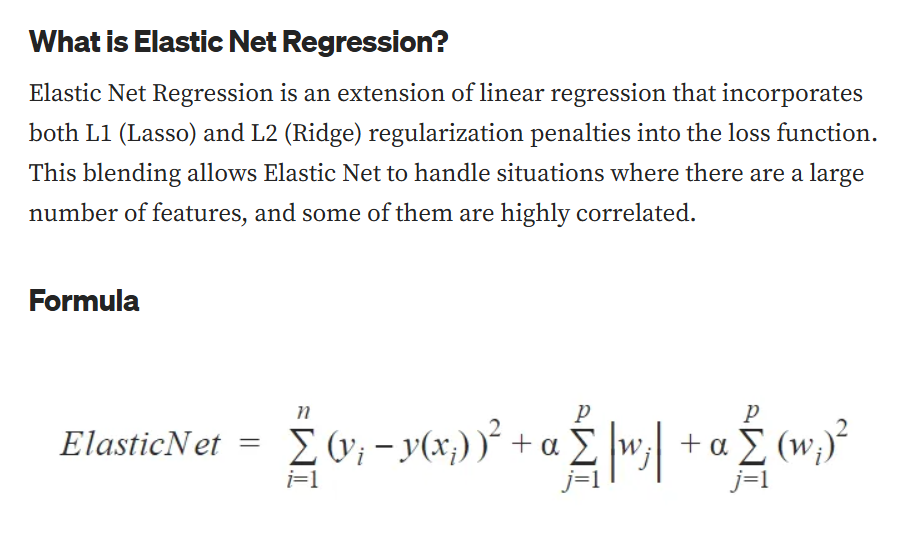

In [423]:
# Create an instance of Elasticnet implementation
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the Lasso model
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

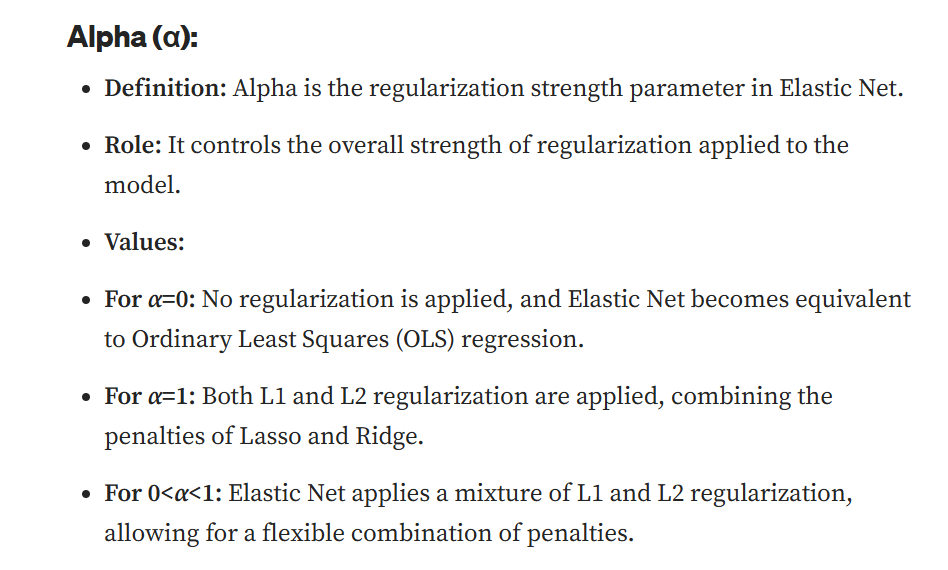

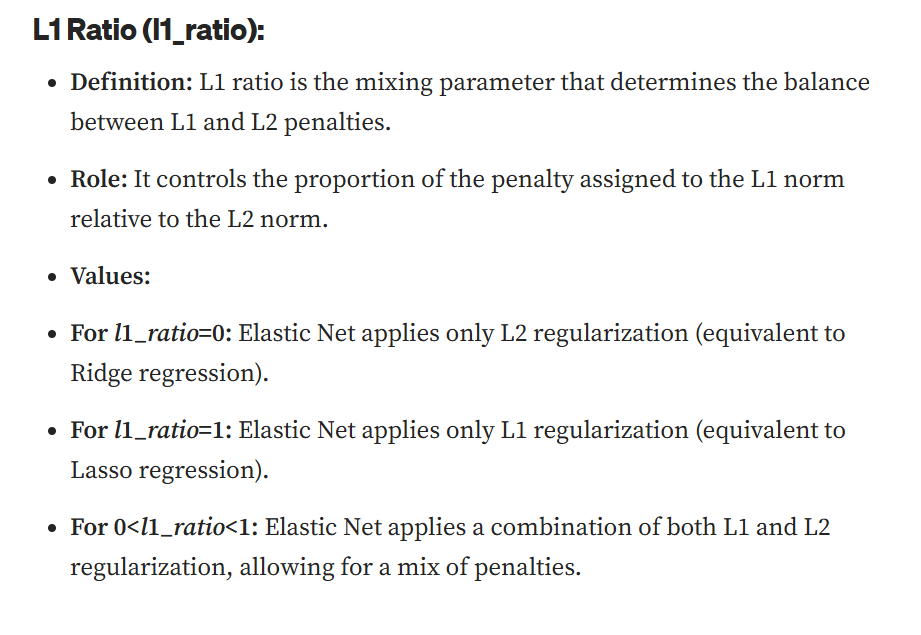

In [424]:
#checking the score
print('Score for training set is :',elasticnet.score(X_train, y_train))
print('Score for test set is :',elasticnet.score(X_test, y_test))

Score for training set is : 0.6761084480227724
Score for test set is : 0.6644973211924632


In [425]:
# Checking the predicted values from the lasso model
y_pred_train_elasticnet=elasticnet.predict(X_train)
y_pred_test_elasticnet=elasticnet.predict(X_test)

In [426]:
# Printing the predicted values
print(y_pred_train_elasticnet)
print(y_pred_test_elasticnet)

[17.28792202 35.63331003 31.13568097 ... 33.07021424 22.98756885
 19.9876126 ]
[19.72532425 25.10827363 18.5942435  ... 19.98434662 28.14288568
 25.19073529]


In [427]:
#calculating MSE(Mean Square Error) for train data
MSE_Linear_regression_elasticnet = mean_squared_error((y_train), (y_pred_train_elasticnet))
print("Mean Square Error(MSE):",MSE_Linear_regression_elasticnet)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression_elasticnet=np.sqrt(MSE_Linear_regression_elasticnet)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression_elasticnet)

#calculating MAE(Mean absoute error)
MAE_Linear_regression_elasticnet= mean_absolute_error(y_train,y_pred_train_elasticnet)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression_elasticnet)

#calculating r2 and adjusted r2
r2_Linear_regression_elasticnet= r2_score((y_train), (y_pred_train_elasticnet))
print("R2 :",r2_Linear_regression_elasticnet)
Adjusted_R2_Linear_regression_elasticnet = (1-(1-r2_score((y_train), (y_pred_train_elasticnet)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression_elasticnet)

Mean Square Error(MSE): 49.987194617802786
Root Mean Square Error(RMSE) : 7.070162276624405
Mean Absoute Error(MAE) : 5.4530011295047975
R2 : 0.6761084480227724
Adjusted R2 : 0.6659987588267812


In [428]:
#Storing
dict11={'Model':'Elascticnet',
       'MAE':round((MAE_Linear_regression_elasticnet),2),
       'MSE':round((MSE_Linear_regression_elasticnet),2),
       'RMSE':round((RMSE_Linear_regression_elasticnet),2),
       'R2_score':round((r2_Linear_regression_elasticnet),2),
       'Adjusted R2':round((Adjusted_R2_Linear_regression_elasticnet),2)
       }

train_df_LR = pd.concat([train_df_LR, pd.DataFrame([dict11])], ignore_index=True)

In [429]:
#calculating MSE(Mean Square Error) for test data
MSE_Linear_regression_elasticnet = mean_squared_error((y_test), (y_pred_test_elasticnet))
print("Mean Square Error(MSE):",MSE_Linear_regression_elasticnet)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression_elasticnet=np.sqrt(MSE_Linear_regression_elasticnet)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression_elasticnet)

#calculating MAE(Mean absoute error)
MAE_Linear_regression_elasticnet= mean_absolute_error(y_test,y_pred_test_elasticnet)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression_elasticnet)

#calculating r2 and adjusted r2
r2_Linear_regression_elasticnet= r2_score((y_test), (y_pred_test_elasticnet))
print("R2 :",r2_Linear_regression_elasticnet)
Adjusted_R2_Linear_regression_elasticnet = (1-(1-r2_score((y_test), (y_pred_test_elasticnet)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression_elasticnet)

Mean Square Error(MSE): 52.83706115840263
Root Mean Square Error(RMSE) : 7.268910589517705
Mean Absoute Error(MAE) : 5.5732408223540775
R2 : 0.6644973211924632
Adjusted R2 : 0.6540252116654905


In [430]:
dict12={'Model':'Elascticnet',
       'MAE':round((MAE_Linear_regression_elasticnet),2),
       'MSE':round((MSE_Linear_regression_elasticnet),2),
       'RMSE':round((RMSE_Linear_regression_elasticnet),2),
       'R2_score':round((r2_Linear_regression_elasticnet),2),
       'Adjusted R2':round((Adjusted_R2_Linear_regression_elasticnet),2)
       }

test_df_LR = pd.concat([test_df_LR, pd.DataFrame([dict12])], ignore_index=True)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [431]:
# Visualizing evaluation Metric Score chart
print('Train metrics')
print('\n')
print(train_df_LR)
print('\n')
print('Test metrics')
print('\n')
print(test_df_LR)

Train metrics


                Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.29  31.82  5.64      0.79         0.79
1               Lasso  7.34  91.45  9.56      0.41         0.39
2           Lasso_cv   4.29  31.82  5.64      0.79         0.79
3               Ridge  4.31  32.12  5.67      0.80         0.79
4            Ridge_CV  4.29  31.82  5.64      0.79         0.79
5         Elascticnet  5.45  49.99  7.07      0.68         0.67


Test metrics


                Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.31  32.12  5.67      0.80         0.79
1              Lasso   7.57  97.88  9.89      0.38         0.36
2           Lasso_CV   4.31  32.12  5.67      0.80         0.79
3               Ridge  4.31  32.12  5.67      0.80         0.79
4            Ridge_CV  4.29  32.12  5.64      0.79         0.79
5         Elascticnet  5.57  52.84  7.27      0.66         0.65


#### 2. Cross- Validation & Hyperparameter Tuning

In [432]:
#Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [433]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.3}

Using  {'alpha': 0.0001, 'l1_ratio': 0.3}  the negative mean squared error is:  -32.35386478472891


In [434]:
# Predict on the model
y_pred_train_elastic=elastic_regressor.predict(X_train)
y_pred_test_elastic=elastic_regressor.predict(X_test)

In [435]:
#calculating MSE(Mean Square Error) for train data
MSE_Linear_regression_elastic = mean_squared_error((y_train), (y_pred_train_elastic))
print("Mean Square Error(MSE):",MSE_Linear_regression_elastic)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression_elastic=np.sqrt(MSE_Linear_regression_elastic)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression_elastic)

#calculating MAE(Mean absoute error)
MAE_Linear_regression_elastic= mean_absolute_error(y_train,y_pred_train_elastic)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression_elastic)

#calculating r2 and adjusted r2
r2_Linear_regression_elastic = r2_score((y_train), (y_pred_train_elastic))
print("R2 :",r2_Linear_regression_elastic)
Adjusted_R2_Linear_regression_elastic = (1-(1-r2_score((y_train), (y_pred_train_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression_elastic)

Mean Square Error(MSE): 31.824299717229486
Root Mean Square Error(RMSE) : 5.641303015902397
Mean Absoute Error(MAE) : 4.286069949563346
R2 : 0.7937947527399172
Adjusted R2 : 0.7873584287677238


In [436]:
#Storing
dict13={'Model':'ElascticnetCV',
       'MAE':round((MAE_Linear_regression_elasticnet),2),
       'MSE':round((MSE_Linear_regression_elasticnet),2),
       'RMSE':round((RMSE_Linear_regression_elasticnet),2),
       'R2_score':round((r2_Linear_regression_elasticnet),2),
       'Adjusted R2':round((Adjusted_R2_Linear_regression_elasticnet),2)
       }


train_df_LR = pd.concat([train_df_LR, pd.DataFrame([dict13])], ignore_index=True)

In [437]:
#calculating MSE(Mean Square Error) for test data
MSE_Linear_regression_elasticnet = mean_squared_error((y_test), (y_pred_test_elastic))
print("Mean Square Error(MSE):",MSE_Linear_regression_elasticnet)


#calculating RMSE(Root Mean Square Error)
RMSE_Linear_regression_elasticnet=np.sqrt(MSE_Linear_regression_elasticnet)
print("Root Mean Square Error(RMSE) :",RMSE_Linear_regression_elasticnet)

#calculating MAE(Mean absoute error)
MAE_Linear_regression_elasticnet= mean_absolute_error(y_test,y_pred_test_elastic)
print("Mean Absoute Error(MAE) :",MAE_Linear_regression_elasticnet)

#calculating r2 and adjusted r2
r2_Linear_regression_elasticnet= r2_score((y_test), (y_pred_test_elastic))
print("R2 :",r2_Linear_regression_elasticnet)
Adjusted_R2_Linear_regression_elasticnet = (1-(1-r2_score((y_test), (y_pred_test_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_Linear_regression_elasticnet)

Mean Square Error(MSE): 32.11925297841482
Root Mean Square Error(RMSE) : 5.667385021190533
Mean Absoute Error(MAE) : 4.30846136816678
R2 : 0.7960504392314898
Adjusted R2 : 0.7896845224348283


In [438]:
#Storing
dict14={'Model':'ElascticnetCV',
       'MAE':round((MAE_Linear_regression_elasticnet),2),
       'MSE':round((MSE_Linear_regression_elasticnet),2),
       'RMSE':round((RMSE_Linear_regression_elasticnet),2),
       'R2_score':round((r2_Linear_regression_elasticnet),2),
       'Adjusted R2':round((Adjusted_R2_Linear_regression_elasticnet),2)
       }

test_df_LR = pd.concat([test_df_LR, pd.DataFrame([dict14])], ignore_index=True)

# **Conclusion**

In [439]:
# Visualizing evaluation Metric Score chart
print('Train metrics')
print('\n')
print(train_df_LR)
print('\n')
print('Test metrics')
print('\n')
print(test_df_LR)

Train metrics


                Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.29  31.82  5.64      0.79         0.79
1               Lasso  7.34  91.45  9.56      0.41         0.39
2           Lasso_cv   4.29  31.82  5.64      0.79         0.79
3               Ridge  4.31  32.12  5.67      0.80         0.79
4            Ridge_CV  4.29  31.82  5.64      0.79         0.79
5         Elascticnet  5.45  49.99  7.07      0.68         0.67
6       ElascticnetCV  5.57  52.84  7.27      0.66         0.65


Test metrics


                Model   MAE    MSE  RMSE  R2_score  Adjusted R2
0  Linear regression   4.31  32.12  5.67      0.80         0.79
1              Lasso   7.57  97.88  9.89      0.38         0.36
2           Lasso_CV   4.31  32.12  5.67      0.80         0.79
3               Ridge  4.31  32.12  5.67      0.80         0.79
4            Ridge_CV  4.29  32.12  5.64      0.79         0.79
5         Elascticnet  5.57  52.84  7.27      0.66         0.65
6      

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***